# Setup

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import random as rd
import os
from tqdm import tqdm
import tensorflow_addons as tfa
import pandas as pd

plt.style.use(['science','ieee'])

2022-05-29 11:54:31.780434: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-29 11:54:31.780485: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Intervalle paramètres

In [2]:
#GeV [min,max]

M1_range = M2_range = M3_range = [50, 5000]
mA_range = [50, 5000]
tanB_range = [2, 60]
mu_range = [-10**4, 10**4]
At_range = Ab_range = Atau_range = [-10**4, 10**4]
Mq1L_range = Mq3L_range = [50, 5000]
MuR_range = MdR_range = MtR_range = MbR_range = [50, 5000]
MeL_range = MtauL_range = MeR_range = MtauR_range = [50, 5000]

PMSSM_range= [M1_range, M2_range, M3_range, mA_range, tanB_range, mu_range, At_range, Ab_range, 
              Atau_range, Mq1L_range, Mq3L_range, MuR_range, MdR_range, MtR_range, MbR_range,
             MeL_range, MtauL_range, MeR_range, MtauR_range]

# Dataset 

In [3]:
taille_dataset = 100
dataset = []
taille_batch = 10

for i in tqdm(range(taille_dataset)):
    batch = [0 for k in range(taille_batch)]
    for j in range(len(batch)):
        batch[j] = np.random.normal(loc=0.0, scale=1.0, size=(4))
    batch = tf.convert_to_tensor(batch)
    
    dataset.append(batch)
    


print("Features mean: %.2f" % (dataset[0].numpy().mean()))
print("Features std: %.2f" % (dataset[0].numpy().std()))


  0%|                                                   | 0/100 [00:00<?, ?it/s]2022-05-29 11:54:36.841870: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-29 11:54:36.841901: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-29 11:54:36.841920: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (MPC): /proc/driver/nvidia/version does not exist
2022-05-29 11:54:36.843107: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
100%|██████████████████████████████████

Features mean: 0.23
Features std: 1.00


# Fichier slha

In [4]:
def write_slha(PMSSM_NN, nom_slha):
    f = open(nom_slha, "w")
    
    f.write("BLOCK MODSEL \n")
    f.write(" 1    0              #MSSM \n")
    
    f.write("BLOCK SMINPUTS \n")
    f.write("  1   1.279340000e+02     # alpha^(-1) SM MSbar(M1) \n")
    f.write("  2   1.663700000e-05     # G_Fermi \n")
    f.write("  3   0.1179              # alphas(MS) SM MSbar \n")
    f.write("  4   91.1876             # MZ(pole) \n")
    f.write("  5   4.18                # mb(mb) SM MSbar \n")
    f.write("  6   172.9               # mtop(pole) \n")
    f.write("  7   1.776860000e+00     #m mtau(pole) \n")
    
    f.write("BLOCK MINPAR \n")
    f.write("  3   "+str(PMSSM_NN[4])+"   #tanb \n")
    
    f.write("BLOCK VCKMIN   #CKM param (Wolfenstein) \n")
    f.write("  1   0.22650  #lambda \n")
    f.write("  2   0.790    #A \n")
    f.write("  3   0.141    #rho \n")
    f.write("  4   0.357    #eta \n")
    
    f.write("BLOCK EXTPAR \n")
    f.write("  0   "+str(-1.0)+"               # Q \n")
    f.write("  1   "+str(PMSSM_NN[0])+"        # M1 \n")
    f.write("  2   "+str(PMSSM_NN[1])+"        # M2 \n")
    f.write("  3   "+str(PMSSM_NN[2])+"        # M3 \n")
    f.write("  11   "+str(PMSSM_NN[6])+"       # At \n")
    f.write("  12   "+str(PMSSM_NN[7])+"       # Ab \n")
    f.write("  13   "+str(PMSSM_NN[8])+"       # Atau \n")
    f.write("  23   "+str(PMSSM_NN[5])+"       # Mu \n")
    f.write("  26   "+str(PMSSM_NN[3])+"       # Ma \n")
    f.write("  31   "+str(PMSSM_NN[15])+"      # MeL \n")
    f.write("  32   "+str(PMSSM_NN[15])+"      # MmuL \n")
    f.write("  33   "+str(PMSSM_NN[16])+"      # MstauL \n")
    f.write("  34   "+str(PMSSM_NN[17])+"      # MeR \n")
    f.write("  35   "+str(PMSSM_NN[17])+"      # MmuR \n")
    f.write("  36   "+str(PMSSM_NN[18])+"      # MstauR \n")
    f.write("  41   "+str(PMSSM_NN[9])+"       # Mq1L \n")
    f.write("  42   "+str(PMSSM_NN[9])+"       # Mq2L \n")
    f.write("  43   "+str(PMSSM_NN[10])+"      # Mq3L \n")
    f.write("  44   "+str(PMSSM_NN[11])+"      # MquR \n")
    f.write("  45   "+str(PMSSM_NN[11])+"      # MqcR \n")
    f.write("  46   "+str(PMSSM_NN[13])+"      # MqtR \n")
    f.write("  47   "+str(PMSSM_NN[12])+"      # MqdR \n")
    f.write("  48   "+str(PMSSM_NN[12])+"      # MqsR \n")
    f.write("  49   "+str(PMSSM_NN[14])+"      # MqbR \n")
    
    f.close()

# Neural Network 

## Loss function

In [5]:
fnc_activation = 'sigmoid'
fnc_activation_output = 'linear'
inputs = tf.keras.Input(shape=(4,), dtype='float32')
x = keras.layers.Dense(19*3, trainable=True, activation=fnc_activation)(inputs)
#x = keras.layers.Dense(6, trainable=True, activation=fnc_activation)(x)
#x = keras.layers.Dense(7, trainable=True, activation=fnc_activation)(x)
#x = keras.layers.Dense(8, trainable=True, activation=fnc_activation)(x)
#x = keras.layers.Dense(9, trainable=True, activation=fnc_activation)(x)
#x = keras.layers.Dense(10, trainable=True, activation=fnc_activation)(x)
#x = keras.layers.Dense(11, trainable=True, activation=fnc_activation)(x)
#x = keras.layers.Dense(12, trainable=True, activation=fnc_activation)(x)
#x = keras.layers.Dense(13, trainable=True, activation=fnc_activation)(x)
#x = keras.layers.Dense(14, trainable=True, activation=fnc_activation)(x)
#x = keras.layers.Dense(15, trainable=True, activation=fnc_activation)(x)
#x = keras.layers.Dense(16, trainable=True, activation=fnc_activation)(x)
#x = keras.layers.Dense(17, trainable=True, activation=fnc_activation)(x)
#x = keras.layers.Dense(18, trainable=True, activation=fnc_activation)(x)
x = keras.layers.Dense(19, activation=fnc_activation)(x)
x = keras.layers.Dense(19*4, activation=fnc_activation)(x)
#x = keras.layers.Dense(19*5, activation=fnc_activation)(x)
#x = keras.layers.Dense(19*5, activation=fnc_activation)(x)
#x = keras.layers.Lambda(lambda y: tf.keras.backend.random_uniform(shape=(19,),minval=0.0,maxval=1.0,)*y)(x)
x = keras.layers.Dense(19, activation=fnc_activation)(x)
outputs = keras.layers.Dense(19, activation=fnc_activation_output)(x)
model = tf.keras.Model(inputs,outputs)

learning_rate = 1e-4
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
#optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
#optimizer = tfa.optimizers.SWA(optimizer, start_averaging=100, average_period=100)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 57)                285       
                                                                 
 dense_1 (Dense)             (None, 19)                1102      
                                                                 
 dense_2 (Dense)             (None, 76)                1520      
                                                                 
 dense_3 (Dense)             (None, 19)                1463      
                                                                 
 dense_4 (Dense)             (None, 19)                380       
                                                                 
Total params: 4,750
Trainable params: 4,750
Non-trainable par

In [6]:
def denormalization(logits):
    PMSSM_NN = []
    
    compteur = 0
    for i in logits:
        m = i * (PMSSM_range[compteur][1]-PMSSM_range[compteur][0]) + PMSSM_range[compteur][0]
        compteur+=1
        PMSSM_NN.append(m)
        
    return PMSSM_NN

In [7]:
def verification_param(PMSSM_NN, PMSSM_range):
    loss = [rd.uniform(0, 1) for i in range(len(PMSSM_NN))]
    correction = False
    
    for i in range(4):
        if PMSSM_NN[i] < PMSSM_range[i][0] or PMSSM_NN[i] > PMSSM_range[i][1]:
            loss[i] = 1.0
            correction = True
    
    if PMSSM_NN[4] < PMSSM_range[4][0] or PMSSM_NN[4] > PMSSM_range[4][1]:
        loss[4] = 1.0
        correction = True
    
    for i in range(4):
        if PMSSM_NN[i+5] < PMSSM_range[i+5][0] or PMSSM_NN[i+5] > PMSSM_range[i+5][1]:
            loss[i+5] = 1.0
            correction = True
        
    for i in range(10):
        if PMSSM_NN[i+9] < PMSSM_range[i+9][0] or PMSSM_NN[i+9] > PMSSM_range[i+9][1]:
            loss[i+9] = 1.0
            correction = True
    
    loss = tf.convert_to_tensor(loss)
    return loss , correction

In [8]:
def loss_function(logits, PMSSM_range, ratio, succes_path):
    logits_tensor = logits
    logits = logits.numpy()
    
    PMSSM_NN = denormalization(logits)
                   
    loss , correction = verification_param(PMSSM_NN, PMSSM_range)
    if correction == True:
        squared_difference = tf.square(logits_tensor - loss)
        ratio[0]+=1
        return tf.reduce_mean(squared_difference, axis=-1)
    
    write_slha(PMSSM_NN, "Advanced NN/GAN/pmssm_nn.in")    
    
    os.system('./SUSY/softsusy-4.1.9/softpoint.x leshouches < Advanced\ NN/GAN/pmssm_nn.in > Advanced\ NN/GAN/pmssm_nn.out')
    
    erreur = False
    
    if os.path.getsize('/home/mathis/Stage M1/Advanced NN/GAN/pmssm_nn.out') == 0 :
        erreur = True
        
    with open('Advanced NN/GAN/pmssm_nn.out') as slha_out:
        content = slha_out.read()
        if 'SOFTSUSY problem' in content:
            erreur = True
        if 'LSP # Warning' in content:
            erreur = True
        
    
    if erreur == True:
        loss = [1.0 for i in range(len(logits))]
        loss = tf.convert_to_tensor(loss)
        squared_difference = tf.square(logits_tensor - loss)
        ratio[0]+=1
        return tf.reduce_mean(squared_difference, axis=-1)
    
    
    if erreur == False:
        ratio[1]+=1
        commande = 'mv Advanced\ NN/GAN/pmssm_nn.out '
        nom_fichier = 'pmssm_nn_succes_'+str(ratio[1])+'.out'
        os.system(commande+succes_path+nom_fichier)
        loss = [rd.uniform(0,1) for i in range(len(logits))]
        loss = tf.convert_to_tensor(loss)
        squared_difference = tf.square(logits_tensor - loss)
        return tf.reduce_mean(squared_difference, axis=-1)        

In [23]:
loss_evolution = []
efficacite = []
ratio = [0,0]
os.chdir('/home/mathis/Stage M1/')
os.system('rm -r Advanced\ NN/GAN/softsusy_succes/')
os.system('mkdir -p Advanced\ NN/GAN/softsusy_succes')
succes_path = 'Advanced\ NN/GAN/softsusy_succes/'


epoch = 1
for k in range(epoch):
    print('Epochs {} / {}'.format(k+1,epoch))
    sum_loss_tot = 0
    for i in tqdm(dataset):
        sum_loss_batch = 0
        with tf.GradientTape(persistent=True) as tape:
            logits = model(i)
            for j in logits:
                loss = loss_function(j, PMSSM_range, ratio, succes_path) 
                print(loss)
                gradients = tape.gradient(loss/len(logits), model.trainable_weights)
                optimizer.apply_gradients(zip(gradients, model.trainable_weights))
            
                sum_loss_batch += loss
        
        sum_loss_tot = sum_loss_batch / len(logits)
        
    loss_evolution.append(sum_loss_tot/len(dataset))
    efficacite.append(ratio[1]/(ratio[0]+ratio[1]))
    
    print('Loss:',sum_loss_tot.numpy()/len(dataset))
    print('Efficacité:',ratio[1]/(ratio[0]+ratio[1]))
    print('\n')
    
print("Nombre d'échecs:",ratio[0])
print("Nombre de succes:",ratio[1])

Epochs 1 / 1


  0%|                                                   | 0/100 [00:00<?, ?it/s]

tf.Tensor(0.05277587, shape=(), dtype=float32)
tf.Tensor(0.0799522, shape=(), dtype=float32)
tf.Tensor(0.06710349, shape=(), dtype=float32)
tf.Tensor(0.10563483, shape=(), dtype=float32)
tf.Tensor(0.07439295, shape=(), dtype=float32)
tf.Tensor(0.11162791, shape=(), dtype=float32)
tf.Tensor(0.09692858, shape=(), dtype=float32)
tf.Tensor(0.08430369, shape=(), dtype=float32)
tf.Tensor(0.07520006, shape=(), dtype=float32)


  1%|▍                                          | 1/100 [00:00<01:15,  1.32it/s]

tf.Tensor(0.09150768, shape=(), dtype=float32)
tf.Tensor(0.07774244, shape=(), dtype=float32)
tf.Tensor(0.09380098, shape=(), dtype=float32)
tf.Tensor(0.085297294, shape=(), dtype=float32)
tf.Tensor(0.09684376, shape=(), dtype=float32)
tf.Tensor(0.06868296, shape=(), dtype=float32)
tf.Tensor(0.08962053, shape=(), dtype=float32)
tf.Tensor(0.07388253, shape=(), dtype=float32)
tf.Tensor(0.0593178, shape=(), dtype=float32)


  2%|▊                                          | 2/100 [00:01<01:16,  1.28it/s]

tf.Tensor(0.0970456, shape=(), dtype=float32)
tf.Tensor(0.10264534, shape=(), dtype=float32)
tf.Tensor(0.06274257, shape=(), dtype=float32)
tf.Tensor(0.054515675, shape=(), dtype=float32)
tf.Tensor(0.071916625, shape=(), dtype=float32)
tf.Tensor(0.07588636, shape=(), dtype=float32)
tf.Tensor(0.07470078, shape=(), dtype=float32)
tf.Tensor(0.08638935, shape=(), dtype=float32)
tf.Tensor(0.06348432, shape=(), dtype=float32)


  3%|█▎                                         | 3/100 [00:02<01:12,  1.33it/s]

tf.Tensor(0.07736118, shape=(), dtype=float32)
tf.Tensor(0.07516839, shape=(), dtype=float32)
tf.Tensor(0.07489901, shape=(), dtype=float32)
tf.Tensor(0.08897095, shape=(), dtype=float32)
tf.Tensor(0.07374026, shape=(), dtype=float32)
tf.Tensor(0.06314933, shape=(), dtype=float32)
tf.Tensor(0.06755869, shape=(), dtype=float32)
tf.Tensor(0.09135193, shape=(), dtype=float32)
tf.Tensor(0.07328237, shape=(), dtype=float32)
tf.Tensor(0.111948825, shape=(), dtype=float32)
tf.Tensor(0.10986383, shape=(), dtype=float32)


  4%|█▋                                         | 4/100 [00:02<01:07,  1.42it/s]

tf.Tensor(0.081965186, shape=(), dtype=float32)
tf.Tensor(0.0744967, shape=(), dtype=float32)
tf.Tensor(0.1060707, shape=(), dtype=float32)
tf.Tensor(0.115165286, shape=(), dtype=float32)
tf.Tensor(0.0913218, shape=(), dtype=float32)
tf.Tensor(0.08295808, shape=(), dtype=float32)
tf.Tensor(0.100810885, shape=(), dtype=float32)
tf.Tensor(0.09569957, shape=(), dtype=float32)
tf.Tensor(0.10548806, shape=(), dtype=float32)
tf.Tensor(0.066591315, shape=(), dtype=float32)


  5%|██▏                                        | 5/100 [00:03<01:07,  1.42it/s]

tf.Tensor(0.065500475, shape=(), dtype=float32)
tf.Tensor(0.083761, shape=(), dtype=float32)
tf.Tensor(0.08960623, shape=(), dtype=float32)
tf.Tensor(0.08809569, shape=(), dtype=float32)
tf.Tensor(0.07324003, shape=(), dtype=float32)
tf.Tensor(0.08888047, shape=(), dtype=float32)
tf.Tensor(0.103227325, shape=(), dtype=float32)
tf.Tensor(0.07222851, shape=(), dtype=float32)
tf.Tensor(0.07970588, shape=(), dtype=float32)


  6%|██▌                                        | 6/100 [00:04<01:05,  1.43it/s]

tf.Tensor(0.0832458, shape=(), dtype=float32)
tf.Tensor(0.04911202, shape=(), dtype=float32)
tf.Tensor(0.09881893, shape=(), dtype=float32)
tf.Tensor(0.097864605, shape=(), dtype=float32)
tf.Tensor(0.05949753, shape=(), dtype=float32)
tf.Tensor(0.08477996, shape=(), dtype=float32)
tf.Tensor(0.061072916, shape=(), dtype=float32)
tf.Tensor(0.088647984, shape=(), dtype=float32)
tf.Tensor(0.0551673, shape=(), dtype=float32)
tf.Tensor(0.08260733, shape=(), dtype=float32)
tf.Tensor(0.04731332, shape=(), dtype=float32)


  7%|███                                        | 7/100 [00:04<01:02,  1.48it/s]

tf.Tensor(0.112998426, shape=(), dtype=float32)
tf.Tensor(0.058755625, shape=(), dtype=float32)
tf.Tensor(0.058716938, shape=(), dtype=float32)
tf.Tensor(0.08483683, shape=(), dtype=float32)
tf.Tensor(0.114384964, shape=(), dtype=float32)
tf.Tensor(0.09166231, shape=(), dtype=float32)
tf.Tensor(0.12499213, shape=(), dtype=float32)
tf.Tensor(0.07994718, shape=(), dtype=float32)
tf.Tensor(0.049059223, shape=(), dtype=float32)
tf.Tensor(0.05999113, shape=(), dtype=float32)


  8%|███▍                                       | 8/100 [00:05<01:03,  1.44it/s]

tf.Tensor(0.08951349, shape=(), dtype=float32)
tf.Tensor(0.05567182, shape=(), dtype=float32)
tf.Tensor(0.09836731, shape=(), dtype=float32)
tf.Tensor(0.09965203, shape=(), dtype=float32)
tf.Tensor(0.09235237, shape=(), dtype=float32)
tf.Tensor(0.06590257, shape=(), dtype=float32)
tf.Tensor(0.097529486, shape=(), dtype=float32)
tf.Tensor(0.07413331, shape=(), dtype=float32)
tf.Tensor(0.10389166, shape=(), dtype=float32)


  9%|███▊                                       | 9/100 [00:06<01:03,  1.42it/s]

tf.Tensor(0.06551209, shape=(), dtype=float32)
tf.Tensor(0.091706246, shape=(), dtype=float32)
tf.Tensor(0.060982063, shape=(), dtype=float32)
tf.Tensor(0.10597779, shape=(), dtype=float32)
tf.Tensor(0.09443996, shape=(), dtype=float32)
tf.Tensor(0.06670052, shape=(), dtype=float32)
tf.Tensor(0.09534067, shape=(), dtype=float32)
tf.Tensor(0.1084052, shape=(), dtype=float32)
tf.Tensor(0.07672377, shape=(), dtype=float32)
tf.Tensor(0.08727366, shape=(), dtype=float32)


 10%|████▏                                     | 10/100 [00:07<01:01,  1.46it/s]

tf.Tensor(0.08043663, shape=(), dtype=float32)
tf.Tensor(0.05320792, shape=(), dtype=float32)
tf.Tensor(0.08976676, shape=(), dtype=float32)
tf.Tensor(0.09445436, shape=(), dtype=float32)
tf.Tensor(0.082187675, shape=(), dtype=float32)
tf.Tensor(0.08552576, shape=(), dtype=float32)
tf.Tensor(0.08509581, shape=(), dtype=float32)
tf.Tensor(0.09224054, shape=(), dtype=float32)
tf.Tensor(0.08280391, shape=(), dtype=float32)
tf.Tensor(0.09140223, shape=(), dtype=float32)
tf.Tensor(0.10163522, shape=(), dtype=float32)
tf.Tensor(0.06573873, shape=(), dtype=float32)


 11%|████▌                                     | 11/100 [00:07<01:01,  1.45it/s]

tf.Tensor(0.058365326, shape=(), dtype=float32)
tf.Tensor(0.06461444, shape=(), dtype=float32)
tf.Tensor(0.10339729, shape=(), dtype=float32)
tf.Tensor(0.047900274, shape=(), dtype=float32)
tf.Tensor(0.08581508, shape=(), dtype=float32)
tf.Tensor(0.09228534, shape=(), dtype=float32)
tf.Tensor(0.07633331, shape=(), dtype=float32)
tf.Tensor(0.115080975, shape=(), dtype=float32)


 12%|█████                                     | 12/100 [00:08<01:05,  1.35it/s]

tf.Tensor(0.09369406, shape=(), dtype=float32)
tf.Tensor(0.09937825, shape=(), dtype=float32)
tf.Tensor(0.079177596, shape=(), dtype=float32)
tf.Tensor(0.06663044, shape=(), dtype=float32)
tf.Tensor(0.085020825, shape=(), dtype=float32)
tf.Tensor(0.065952525, shape=(), dtype=float32)
tf.Tensor(0.07288515, shape=(), dtype=float32)
tf.Tensor(0.06266546, shape=(), dtype=float32)
tf.Tensor(0.06722518, shape=(), dtype=float32)
tf.Tensor(0.10109428, shape=(), dtype=float32)
tf.Tensor(0.09956873, shape=(), dtype=float32)


 13%|█████▍                                    | 13/100 [00:09<01:07,  1.28it/s]

tf.Tensor(0.10703149, shape=(), dtype=float32)
tf.Tensor(0.07262282, shape=(), dtype=float32)
tf.Tensor(0.09771465, shape=(), dtype=float32)
tf.Tensor(0.0628055, shape=(), dtype=float32)
tf.Tensor(0.079793274, shape=(), dtype=float32)
tf.Tensor(0.071207166, shape=(), dtype=float32)
tf.Tensor(0.09196695, shape=(), dtype=float32)
tf.Tensor(0.07192322, shape=(), dtype=float32)
tf.Tensor(0.07578008, shape=(), dtype=float32)
tf.Tensor(0.085401826, shape=(), dtype=float32)


 14%|█████▉                                    | 14/100 [00:10<01:08,  1.25it/s]

tf.Tensor(0.07204496, shape=(), dtype=float32)
tf.Tensor(0.097762324, shape=(), dtype=float32)
tf.Tensor(0.050695322, shape=(), dtype=float32)
tf.Tensor(0.08074119, shape=(), dtype=float32)
tf.Tensor(0.09297989, shape=(), dtype=float32)
tf.Tensor(0.086085476, shape=(), dtype=float32)
tf.Tensor(0.086083785, shape=(), dtype=float32)
tf.Tensor(0.09135928, shape=(), dtype=float32)
tf.Tensor(0.07926962, shape=(), dtype=float32)
tf.Tensor(0.070016645, shape=(), dtype=float32)
tf.Tensor(0.05731734, shape=(), dtype=float32)


 15%|██████▎                                   | 15/100 [00:10<01:02,  1.35it/s]

tf.Tensor(0.08429821, shape=(), dtype=float32)
tf.Tensor(0.045972005, shape=(), dtype=float32)
tf.Tensor(0.0992452, shape=(), dtype=float32)
tf.Tensor(0.10093566, shape=(), dtype=float32)
tf.Tensor(0.07427257, shape=(), dtype=float32)
tf.Tensor(0.10875275, shape=(), dtype=float32)
tf.Tensor(0.09160894, shape=(), dtype=float32)
tf.Tensor(0.0913832, shape=(), dtype=float32)
tf.Tensor(0.11323054, shape=(), dtype=float32)


 16%|██████▋                                   | 16/100 [00:11<01:00,  1.38it/s]

tf.Tensor(0.069838524, shape=(), dtype=float32)
tf.Tensor(0.109865114, shape=(), dtype=float32)
tf.Tensor(0.08704569, shape=(), dtype=float32)
tf.Tensor(0.07868876, shape=(), dtype=float32)
tf.Tensor(0.06198077, shape=(), dtype=float32)
tf.Tensor(0.096825145, shape=(), dtype=float32)
tf.Tensor(0.06754255, shape=(), dtype=float32)
tf.Tensor(0.10209096, shape=(), dtype=float32)
tf.Tensor(0.06550875, shape=(), dtype=float32)
tf.Tensor(0.05698615, shape=(), dtype=float32)


 17%|███████▏                                  | 17/100 [00:12<01:05,  1.27it/s]

tf.Tensor(0.086142704, shape=(), dtype=float32)
tf.Tensor(0.09981647, shape=(), dtype=float32)
tf.Tensor(0.106792875, shape=(), dtype=float32)
tf.Tensor(0.06959047, shape=(), dtype=float32)
tf.Tensor(0.108409114, shape=(), dtype=float32)
tf.Tensor(0.073413655, shape=(), dtype=float32)
tf.Tensor(0.06949509, shape=(), dtype=float32)
tf.Tensor(0.07046888, shape=(), dtype=float32)
tf.Tensor(0.07013137, shape=(), dtype=float32)
tf.Tensor(0.07976677, shape=(), dtype=float32)
tf.Tensor(0.0963811, shape=(), dtype=float32)


 18%|███████▌                                  | 18/100 [00:13<01:09,  1.18it/s]

tf.Tensor(0.10664326, shape=(), dtype=float32)
tf.Tensor(0.04762386, shape=(), dtype=float32)
tf.Tensor(0.079610616, shape=(), dtype=float32)
tf.Tensor(0.10016948, shape=(), dtype=float32)
tf.Tensor(0.07020626, shape=(), dtype=float32)
tf.Tensor(0.089614995, shape=(), dtype=float32)
tf.Tensor(0.08970616, shape=(), dtype=float32)
tf.Tensor(0.061463017, shape=(), dtype=float32)


 19%|███████▉                                  | 19/100 [00:14<01:07,  1.20it/s]

tf.Tensor(0.073778175, shape=(), dtype=float32)
tf.Tensor(0.04450733, shape=(), dtype=float32)
tf.Tensor(0.073408015, shape=(), dtype=float32)
tf.Tensor(0.10058329, shape=(), dtype=float32)
tf.Tensor(0.06491308, shape=(), dtype=float32)
tf.Tensor(0.107844256, shape=(), dtype=float32)
tf.Tensor(0.101571515, shape=(), dtype=float32)
tf.Tensor(0.07431263, shape=(), dtype=float32)
tf.Tensor(0.08653984, shape=(), dtype=float32)
tf.Tensor(0.07189726, shape=(), dtype=float32)
tf.Tensor(0.08029271, shape=(), dtype=float32)
tf.Tensor(0.07080517, shape=(), dtype=float32)


 20%|████████▍                                 | 20/100 [00:15<01:06,  1.21it/s]

tf.Tensor(0.09862942, shape=(), dtype=float32)
tf.Tensor(0.09579096, shape=(), dtype=float32)
tf.Tensor(0.073496506, shape=(), dtype=float32)
tf.Tensor(0.08164304, shape=(), dtype=float32)
tf.Tensor(0.09654289, shape=(), dtype=float32)
tf.Tensor(0.096007645, shape=(), dtype=float32)
tf.Tensor(0.089382395, shape=(), dtype=float32)
tf.Tensor(0.11801617, shape=(), dtype=float32)
tf.Tensor(0.09716975, shape=(), dtype=float32)


 21%|████████▊                                 | 21/100 [00:15<01:02,  1.27it/s]

tf.Tensor(0.10448649, shape=(), dtype=float32)
tf.Tensor(0.058154453, shape=(), dtype=float32)
tf.Tensor(0.07342043, shape=(), dtype=float32)
tf.Tensor(0.09173006, shape=(), dtype=float32)
tf.Tensor(0.075250514, shape=(), dtype=float32)
tf.Tensor(0.09291531, shape=(), dtype=float32)
tf.Tensor(0.07920808, shape=(), dtype=float32)
tf.Tensor(0.07355413, shape=(), dtype=float32)
tf.Tensor(0.059969414, shape=(), dtype=float32)
tf.Tensor(0.111134656, shape=(), dtype=float32)


 22%|█████████▏                                | 22/100 [00:16<00:58,  1.33it/s]

tf.Tensor(0.066166796, shape=(), dtype=float32)
tf.Tensor(0.09345406, shape=(), dtype=float32)
tf.Tensor(0.074168265, shape=(), dtype=float32)
tf.Tensor(0.06689074, shape=(), dtype=float32)
tf.Tensor(0.06573347, shape=(), dtype=float32)
tf.Tensor(0.08789963, shape=(), dtype=float32)
tf.Tensor(0.07803548, shape=(), dtype=float32)
tf.Tensor(0.07924285, shape=(), dtype=float32)
tf.Tensor(0.059814326, shape=(), dtype=float32)
tf.Tensor(0.092668556, shape=(), dtype=float32)
tf.Tensor(0.07975318, shape=(), dtype=float32)


 23%|█████████▋                                | 23/100 [00:17<00:55,  1.38it/s]

tf.Tensor(0.10359719, shape=(), dtype=float32)
tf.Tensor(0.0990955, shape=(), dtype=float32)
tf.Tensor(0.048282374, shape=(), dtype=float32)
tf.Tensor(0.10218073, shape=(), dtype=float32)
tf.Tensor(0.06515372, shape=(), dtype=float32)
tf.Tensor(0.07967164, shape=(), dtype=float32)
tf.Tensor(0.06221617, shape=(), dtype=float32)
tf.Tensor(0.09228053, shape=(), dtype=float32)
tf.Tensor(0.10836699, shape=(), dtype=float32)
tf.Tensor(0.09832439, shape=(), dtype=float32)


 24%|██████████                                | 24/100 [00:17<00:54,  1.40it/s]

tf.Tensor(0.07909427, shape=(), dtype=float32)
tf.Tensor(0.07131943, shape=(), dtype=float32)
tf.Tensor(0.05989672, shape=(), dtype=float32)
tf.Tensor(0.06769443, shape=(), dtype=float32)
tf.Tensor(0.08341478, shape=(), dtype=float32)
tf.Tensor(0.055186253, shape=(), dtype=float32)
tf.Tensor(0.04746504, shape=(), dtype=float32)
tf.Tensor(0.09579849, shape=(), dtype=float32)
tf.Tensor(0.09543412, shape=(), dtype=float32)
tf.Tensor(0.10139129, shape=(), dtype=float32)


 25%|██████████▌                               | 25/100 [00:18<00:52,  1.42it/s]

tf.Tensor(0.12691249, shape=(), dtype=float32)
tf.Tensor(0.059224468, shape=(), dtype=float32)
tf.Tensor(0.096001945, shape=(), dtype=float32)
tf.Tensor(0.096332274, shape=(), dtype=float32)
tf.Tensor(0.07776164, shape=(), dtype=float32)
tf.Tensor(0.077574246, shape=(), dtype=float32)
tf.Tensor(0.08099374, shape=(), dtype=float32)
tf.Tensor(0.06411418, shape=(), dtype=float32)
tf.Tensor(0.09310408, shape=(), dtype=float32)
tf.Tensor(0.079868376, shape=(), dtype=float32)


 26%|██████████▉                               | 26/100 [00:19<00:51,  1.44it/s]

tf.Tensor(0.09188052, shape=(), dtype=float32)
tf.Tensor(0.075019985, shape=(), dtype=float32)
tf.Tensor(0.07477221, shape=(), dtype=float32)
tf.Tensor(0.10114823, shape=(), dtype=float32)
tf.Tensor(0.08297361, shape=(), dtype=float32)
tf.Tensor(0.055181164, shape=(), dtype=float32)
tf.Tensor(0.07917013, shape=(), dtype=float32)
tf.Tensor(0.09835173, shape=(), dtype=float32)
tf.Tensor(0.06540616, shape=(), dtype=float32)


 27%|███████████▎                              | 27/100 [00:19<00:51,  1.41it/s]

tf.Tensor(0.09039674, shape=(), dtype=float32)
tf.Tensor(0.09991179, shape=(), dtype=float32)
tf.Tensor(0.09600699, shape=(), dtype=float32)
tf.Tensor(0.09587856, shape=(), dtype=float32)
tf.Tensor(0.09700159, shape=(), dtype=float32)
tf.Tensor(0.09323581, shape=(), dtype=float32)
tf.Tensor(0.10251797, shape=(), dtype=float32)
tf.Tensor(0.06594166, shape=(), dtype=float32)
tf.Tensor(0.076743096, shape=(), dtype=float32)
tf.Tensor(0.09254521, shape=(), dtype=float32)


 28%|███████████▊                              | 28/100 [00:20<00:50,  1.42it/s]

tf.Tensor(0.07273374, shape=(), dtype=float32)
tf.Tensor(0.06960742, shape=(), dtype=float32)
tf.Tensor(0.062945746, shape=(), dtype=float32)
tf.Tensor(0.10016195, shape=(), dtype=float32)
tf.Tensor(0.0809517, shape=(), dtype=float32)
tf.Tensor(0.045320354, shape=(), dtype=float32)
tf.Tensor(0.06635022, shape=(), dtype=float32)
tf.Tensor(0.07880879, shape=(), dtype=float32)
tf.Tensor(0.09926802, shape=(), dtype=float32)
tf.Tensor(0.0936098, shape=(), dtype=float32)


 29%|████████████▏                             | 29/100 [00:21<00:50,  1.41it/s]

tf.Tensor(0.10895001, shape=(), dtype=float32)
tf.Tensor(0.079410486, shape=(), dtype=float32)
tf.Tensor(0.09293884, shape=(), dtype=float32)
tf.Tensor(0.101758935, shape=(), dtype=float32)
tf.Tensor(0.08727785, shape=(), dtype=float32)
tf.Tensor(0.0947398, shape=(), dtype=float32)
tf.Tensor(0.08821615, shape=(), dtype=float32)
tf.Tensor(0.09718972, shape=(), dtype=float32)
tf.Tensor(0.07703811, shape=(), dtype=float32)
tf.Tensor(0.097275026, shape=(), dtype=float32)


 30%|████████████▌                             | 30/100 [00:22<00:49,  1.41it/s]

tf.Tensor(0.08060953, shape=(), dtype=float32)
tf.Tensor(0.1190528, shape=(), dtype=float32)
tf.Tensor(0.0454334, shape=(), dtype=float32)
tf.Tensor(0.105722375, shape=(), dtype=float32)
tf.Tensor(0.10148285, shape=(), dtype=float32)
tf.Tensor(0.07442026, shape=(), dtype=float32)
tf.Tensor(0.074462995, shape=(), dtype=float32)
tf.Tensor(0.07042163, shape=(), dtype=float32)
tf.Tensor(0.07583721, shape=(), dtype=float32)
tf.Tensor(0.09724036, shape=(), dtype=float32)


 31%|█████████████                             | 31/100 [00:22<00:48,  1.43it/s]

tf.Tensor(0.07533275, shape=(), dtype=float32)
tf.Tensor(0.086258836, shape=(), dtype=float32)
tf.Tensor(0.08160295, shape=(), dtype=float32)
tf.Tensor(0.10752285, shape=(), dtype=float32)
tf.Tensor(0.08748227, shape=(), dtype=float32)
tf.Tensor(0.057028282, shape=(), dtype=float32)
tf.Tensor(0.075133406, shape=(), dtype=float32)
tf.Tensor(0.09813267, shape=(), dtype=float32)
tf.Tensor(0.08335821, shape=(), dtype=float32)


 32%|█████████████▍                            | 32/100 [00:23<00:48,  1.40it/s]

tf.Tensor(0.08417677, shape=(), dtype=float32)
tf.Tensor(0.08574011, shape=(), dtype=float32)
tf.Tensor(0.0794023, shape=(), dtype=float32)
tf.Tensor(0.0497348, shape=(), dtype=float32)
tf.Tensor(0.10811507, shape=(), dtype=float32)
tf.Tensor(0.08921145, shape=(), dtype=float32)
tf.Tensor(0.089761175, shape=(), dtype=float32)
tf.Tensor(0.11017878, shape=(), dtype=float32)
tf.Tensor(0.07981247, shape=(), dtype=float32)
tf.Tensor(0.07222345, shape=(), dtype=float32)
tf.Tensor(0.09898976, shape=(), dtype=float32)
tf.Tensor(0.093801945, shape=(), dtype=float32)


 33%|█████████████▊                            | 33/100 [00:24<00:48,  1.39it/s]

tf.Tensor(0.098027766, shape=(), dtype=float32)
tf.Tensor(0.111318015, shape=(), dtype=float32)
tf.Tensor(0.081747465, shape=(), dtype=float32)
tf.Tensor(0.09337581, shape=(), dtype=float32)
tf.Tensor(0.06090924, shape=(), dtype=float32)
tf.Tensor(0.103304684, shape=(), dtype=float32)
tf.Tensor(0.09241239, shape=(), dtype=float32)
tf.Tensor(0.07667568, shape=(), dtype=float32)
tf.Tensor(0.087755844, shape=(), dtype=float32)
tf.Tensor(0.0839282, shape=(), dtype=float32)
tf.Tensor(0.07027542, shape=(), dtype=float32)


 34%|██████████████▎                           | 34/100 [00:24<00:46,  1.41it/s]

tf.Tensor(0.073289834, shape=(), dtype=float32)
tf.Tensor(0.07744689, shape=(), dtype=float32)
tf.Tensor(0.12252903, shape=(), dtype=float32)
tf.Tensor(0.08531588, shape=(), dtype=float32)
tf.Tensor(0.068353936, shape=(), dtype=float32)
tf.Tensor(0.07541162, shape=(), dtype=float32)
tf.Tensor(0.084708214, shape=(), dtype=float32)
tf.Tensor(0.087796785, shape=(), dtype=float32)
tf.Tensor(0.09210425, shape=(), dtype=float32)


 35%|██████████████▋                           | 35/100 [00:25<00:46,  1.41it/s]

tf.Tensor(0.06562721, shape=(), dtype=float32)
tf.Tensor(0.06454778, shape=(), dtype=float32)
tf.Tensor(0.07799094, shape=(), dtype=float32)
tf.Tensor(0.090012886, shape=(), dtype=float32)
tf.Tensor(0.05401283, shape=(), dtype=float32)
tf.Tensor(0.09680015, shape=(), dtype=float32)
tf.Tensor(0.06786615, shape=(), dtype=float32)
tf.Tensor(0.04730649, shape=(), dtype=float32)
tf.Tensor(0.07532718, shape=(), dtype=float32)


 36%|███████████████                           | 36/100 [00:26<00:45,  1.42it/s]

tf.Tensor(0.094379924, shape=(), dtype=float32)
tf.Tensor(0.09157032, shape=(), dtype=float32)
tf.Tensor(0.093515806, shape=(), dtype=float32)
tf.Tensor(0.08605216, shape=(), dtype=float32)
tf.Tensor(0.047303155, shape=(), dtype=float32)
tf.Tensor(0.094082385, shape=(), dtype=float32)
tf.Tensor(0.09444153, shape=(), dtype=float32)
tf.Tensor(0.09610008, shape=(), dtype=float32)
tf.Tensor(0.122094855, shape=(), dtype=float32)
tf.Tensor(0.09006355, shape=(), dtype=float32)


 37%|███████████████▌                          | 37/100 [00:26<00:42,  1.47it/s]

tf.Tensor(0.09659076, shape=(), dtype=float32)
tf.Tensor(0.09661126, shape=(), dtype=float32)
tf.Tensor(0.08063956, shape=(), dtype=float32)
tf.Tensor(0.06358746, shape=(), dtype=float32)
tf.Tensor(0.08931786, shape=(), dtype=float32)
tf.Tensor(0.082645975, shape=(), dtype=float32)
tf.Tensor(0.074839614, shape=(), dtype=float32)
tf.Tensor(0.07073043, shape=(), dtype=float32)
tf.Tensor(0.10040317, shape=(), dtype=float32)
tf.Tensor(0.08049207, shape=(), dtype=float32)
tf.Tensor(0.07252426, shape=(), dtype=float32)


 38%|███████████████▉                          | 38/100 [00:27<00:41,  1.48it/s]

tf.Tensor(0.10689952, shape=(), dtype=float32)
tf.Tensor(0.08647561, shape=(), dtype=float32)
tf.Tensor(0.08429198, shape=(), dtype=float32)
tf.Tensor(0.07632246, shape=(), dtype=float32)
tf.Tensor(0.08118833, shape=(), dtype=float32)
tf.Tensor(0.06639046, shape=(), dtype=float32)
tf.Tensor(0.09355035, shape=(), dtype=float32)
tf.Tensor(0.079093546, shape=(), dtype=float32)
tf.Tensor(0.086684056, shape=(), dtype=float32)
tf.Tensor(0.07911848, shape=(), dtype=float32)


 39%|████████████████▍                         | 39/100 [00:28<00:41,  1.47it/s]

tf.Tensor(0.07745263, shape=(), dtype=float32)
tf.Tensor(0.09028119, shape=(), dtype=float32)
tf.Tensor(0.09358661, shape=(), dtype=float32)
tf.Tensor(0.059260532, shape=(), dtype=float32)
tf.Tensor(0.06531888, shape=(), dtype=float32)
tf.Tensor(0.082180224, shape=(), dtype=float32)
tf.Tensor(0.06889826, shape=(), dtype=float32)
tf.Tensor(0.083697006, shape=(), dtype=float32)


 40%|████████████████▊                         | 40/100 [00:28<00:39,  1.53it/s]

tf.Tensor(0.098588526, shape=(), dtype=float32)
tf.Tensor(0.087284975, shape=(), dtype=float32)
tf.Tensor(0.067278475, shape=(), dtype=float32)
tf.Tensor(0.11353375, shape=(), dtype=float32)
tf.Tensor(0.07786407, shape=(), dtype=float32)
tf.Tensor(0.11693622, shape=(), dtype=float32)
tf.Tensor(0.084481835, shape=(), dtype=float32)
tf.Tensor(0.06961038, shape=(), dtype=float32)
tf.Tensor(0.06655233, shape=(), dtype=float32)
tf.Tensor(0.08633347, shape=(), dtype=float32)


 41%|█████████████████▏                        | 41/100 [00:29<00:39,  1.51it/s]

tf.Tensor(0.057538755, shape=(), dtype=float32)
tf.Tensor(0.07703761, shape=(), dtype=float32)
tf.Tensor(0.062238354, shape=(), dtype=float32)
tf.Tensor(0.053736538, shape=(), dtype=float32)
tf.Tensor(0.095430076, shape=(), dtype=float32)
tf.Tensor(0.07196134, shape=(), dtype=float32)
tf.Tensor(0.07057538, shape=(), dtype=float32)
tf.Tensor(0.06847837, shape=(), dtype=float32)
tf.Tensor(0.089700066, shape=(), dtype=float32)
tf.Tensor(0.051432032, shape=(), dtype=float32)
tf.Tensor(0.103835694, shape=(), dtype=float32)
tf.Tensor(0.09369695, shape=(), dtype=float32)


 42%|█████████████████▋                        | 42/100 [00:30<00:39,  1.47it/s]

tf.Tensor(0.08007584, shape=(), dtype=float32)
tf.Tensor(0.08774787, shape=(), dtype=float32)
tf.Tensor(0.102305464, shape=(), dtype=float32)
tf.Tensor(0.08829856, shape=(), dtype=float32)
tf.Tensor(0.09361157, shape=(), dtype=float32)
tf.Tensor(0.07876557, shape=(), dtype=float32)
tf.Tensor(0.063494936, shape=(), dtype=float32)
tf.Tensor(0.09180804, shape=(), dtype=float32)


 43%|██████████████████                        | 43/100 [00:30<00:37,  1.51it/s]

tf.Tensor(0.08254796, shape=(), dtype=float32)
tf.Tensor(0.09580298, shape=(), dtype=float32)
tf.Tensor(0.063681945, shape=(), dtype=float32)
tf.Tensor(0.10608339, shape=(), dtype=float32)
tf.Tensor(0.10427506, shape=(), dtype=float32)
tf.Tensor(0.09184035, shape=(), dtype=float32)
tf.Tensor(0.097191624, shape=(), dtype=float32)
tf.Tensor(0.08319793, shape=(), dtype=float32)
tf.Tensor(0.09198428, shape=(), dtype=float32)
tf.Tensor(0.098648965, shape=(), dtype=float32)
tf.Tensor(0.07884735, shape=(), dtype=float32)
tf.Tensor(0.07492728, shape=(), dtype=float32)


 44%|██████████████████▍                       | 44/100 [00:31<00:40,  1.40it/s]

tf.Tensor(0.07272738, shape=(), dtype=float32)
tf.Tensor(0.0804409, shape=(), dtype=float32)
tf.Tensor(0.047776498, shape=(), dtype=float32)
tf.Tensor(0.08543695, shape=(), dtype=float32)
tf.Tensor(0.074968286, shape=(), dtype=float32)
tf.Tensor(0.05569581, shape=(), dtype=float32)
tf.Tensor(0.08549859, shape=(), dtype=float32)


 45%|██████████████████▉                       | 45/100 [00:32<00:38,  1.43it/s]

tf.Tensor(0.091394104, shape=(), dtype=float32)
tf.Tensor(0.09451969, shape=(), dtype=float32)
tf.Tensor(0.084887415, shape=(), dtype=float32)
tf.Tensor(0.093218036, shape=(), dtype=float32)
tf.Tensor(0.0819277, shape=(), dtype=float32)
tf.Tensor(0.084074296, shape=(), dtype=float32)
tf.Tensor(0.08977622, shape=(), dtype=float32)
tf.Tensor(0.06634909, shape=(), dtype=float32)
tf.Tensor(0.089964665, shape=(), dtype=float32)
tf.Tensor(0.11117659, shape=(), dtype=float32)
tf.Tensor(0.080192365, shape=(), dtype=float32)


 46%|███████████████████▎                      | 46/100 [00:33<00:36,  1.48it/s]

tf.Tensor(0.08675229, shape=(), dtype=float32)
tf.Tensor(0.100470416, shape=(), dtype=float32)
tf.Tensor(0.070890285, shape=(), dtype=float32)
tf.Tensor(0.087073624, shape=(), dtype=float32)
tf.Tensor(0.06952009, shape=(), dtype=float32)
tf.Tensor(0.10969137, shape=(), dtype=float32)
tf.Tensor(0.11639256, shape=(), dtype=float32)
tf.Tensor(0.10335398, shape=(), dtype=float32)
tf.Tensor(0.09732934, shape=(), dtype=float32)
tf.Tensor(0.0922185, shape=(), dtype=float32)
tf.Tensor(0.10766899, shape=(), dtype=float32)
tf.Tensor(0.09377547, shape=(), dtype=float32)


 47%|███████████████████▋                      | 47/100 [00:33<00:38,  1.39it/s]

tf.Tensor(0.100687325, shape=(), dtype=float32)
tf.Tensor(0.08711907, shape=(), dtype=float32)
tf.Tensor(0.10260135, shape=(), dtype=float32)
tf.Tensor(0.09532818, shape=(), dtype=float32)
tf.Tensor(0.057250958, shape=(), dtype=float32)
tf.Tensor(0.10114311, shape=(), dtype=float32)
tf.Tensor(0.12718971, shape=(), dtype=float32)


 48%|████████████████████▏                     | 48/100 [00:34<00:36,  1.43it/s]

tf.Tensor(0.0901101, shape=(), dtype=float32)
tf.Tensor(0.090784535, shape=(), dtype=float32)
tf.Tensor(0.11017213, shape=(), dtype=float32)
tf.Tensor(0.061303765, shape=(), dtype=float32)
tf.Tensor(0.07587364, shape=(), dtype=float32)
tf.Tensor(0.08127584, shape=(), dtype=float32)
tf.Tensor(0.09986161, shape=(), dtype=float32)
tf.Tensor(0.09616535, shape=(), dtype=float32)
tf.Tensor(0.074885085, shape=(), dtype=float32)
tf.Tensor(0.075440906, shape=(), dtype=float32)
tf.Tensor(0.06998243, shape=(), dtype=float32)


 49%|████████████████████▌                     | 49/100 [00:35<00:34,  1.47it/s]

tf.Tensor(0.09429771, shape=(), dtype=float32)
tf.Tensor(0.066970475, shape=(), dtype=float32)
tf.Tensor(0.07437366, shape=(), dtype=float32)
tf.Tensor(0.076457195, shape=(), dtype=float32)
tf.Tensor(0.06867116, shape=(), dtype=float32)
tf.Tensor(0.1009901, shape=(), dtype=float32)
tf.Tensor(0.106099, shape=(), dtype=float32)
tf.Tensor(0.057159726, shape=(), dtype=float32)
tf.Tensor(0.08007168, shape=(), dtype=float32)
tf.Tensor(0.06041454, shape=(), dtype=float32)
tf.Tensor(0.097221725, shape=(), dtype=float32)


 50%|█████████████████████                     | 50/100 [00:35<00:33,  1.48it/s]

tf.Tensor(0.10299593, shape=(), dtype=float32)
tf.Tensor(0.12953086, shape=(), dtype=float32)
tf.Tensor(0.073392265, shape=(), dtype=float32)
tf.Tensor(0.094491646, shape=(), dtype=float32)
tf.Tensor(0.07486867, shape=(), dtype=float32)
tf.Tensor(0.09553085, shape=(), dtype=float32)
tf.Tensor(0.1179745, shape=(), dtype=float32)
tf.Tensor(0.08023424, shape=(), dtype=float32)
tf.Tensor(0.08370894, shape=(), dtype=float32)
tf.Tensor(0.10544755, shape=(), dtype=float32)
tf.Tensor(0.052007277, shape=(), dtype=float32)


 51%|█████████████████████▍                    | 51/100 [00:36<00:32,  1.49it/s]

tf.Tensor(0.087569214, shape=(), dtype=float32)
tf.Tensor(0.09647522, shape=(), dtype=float32)
tf.Tensor(0.05777646, shape=(), dtype=float32)
tf.Tensor(0.11023309, shape=(), dtype=float32)
tf.Tensor(0.06841306, shape=(), dtype=float32)
tf.Tensor(0.10371705, shape=(), dtype=float32)
tf.Tensor(0.06864256, shape=(), dtype=float32)
tf.Tensor(0.111630425, shape=(), dtype=float32)


 52%|█████████████████████▊                    | 52/100 [00:37<00:31,  1.52it/s]

tf.Tensor(0.1013283, shape=(), dtype=float32)
tf.Tensor(0.077439494, shape=(), dtype=float32)
tf.Tensor(0.06389008, shape=(), dtype=float32)
tf.Tensor(0.110680565, shape=(), dtype=float32)
tf.Tensor(0.1082142, shape=(), dtype=float32)
tf.Tensor(0.065135, shape=(), dtype=float32)
tf.Tensor(0.07869237, shape=(), dtype=float32)
tf.Tensor(0.12001991, shape=(), dtype=float32)
tf.Tensor(0.08342678, shape=(), dtype=float32)
tf.Tensor(0.05073658, shape=(), dtype=float32)
tf.Tensor(0.06994099, shape=(), dtype=float32)
tf.Tensor(0.045068074, shape=(), dtype=float32)


 53%|██████████████████████▎                   | 53/100 [00:37<00:31,  1.49it/s]

tf.Tensor(0.061213505, shape=(), dtype=float32)
tf.Tensor(0.077767394, shape=(), dtype=float32)
tf.Tensor(0.0908267, shape=(), dtype=float32)
tf.Tensor(0.06078103, shape=(), dtype=float32)
tf.Tensor(0.10235843, shape=(), dtype=float32)
tf.Tensor(0.082079984, shape=(), dtype=float32)
tf.Tensor(0.10776348, shape=(), dtype=float32)
tf.Tensor(0.11375425, shape=(), dtype=float32)
tf.Tensor(0.09567565, shape=(), dtype=float32)
tf.Tensor(0.103052236, shape=(), dtype=float32)


 54%|██████████████████████▋                   | 54/100 [00:38<00:31,  1.48it/s]

tf.Tensor(0.09581668, shape=(), dtype=float32)
tf.Tensor(0.094216004, shape=(), dtype=float32)
tf.Tensor(0.08209619, shape=(), dtype=float32)
tf.Tensor(0.07775571, shape=(), dtype=float32)
tf.Tensor(0.094436824, shape=(), dtype=float32)
tf.Tensor(0.08409918, shape=(), dtype=float32)
tf.Tensor(0.09899388, shape=(), dtype=float32)
tf.Tensor(0.06274, shape=(), dtype=float32)
tf.Tensor(0.084536426, shape=(), dtype=float32)
tf.Tensor(0.07577542, shape=(), dtype=float32)


 55%|███████████████████████                   | 55/100 [00:39<00:30,  1.50it/s]

tf.Tensor(0.053343836, shape=(), dtype=float32)
tf.Tensor(0.118314646, shape=(), dtype=float32)
tf.Tensor(0.04450372, shape=(), dtype=float32)
tf.Tensor(0.07040725, shape=(), dtype=float32)
tf.Tensor(0.0935237, shape=(), dtype=float32)
tf.Tensor(0.066112444, shape=(), dtype=float32)
tf.Tensor(0.07898787, shape=(), dtype=float32)
tf.Tensor(0.09165861, shape=(), dtype=float32)
tf.Tensor(0.07307956, shape=(), dtype=float32)
tf.Tensor(0.09263065, shape=(), dtype=float32)


 56%|███████████████████████▌                  | 56/100 [00:39<00:29,  1.49it/s]

tf.Tensor(0.09701452, shape=(), dtype=float32)
tf.Tensor(0.06264859, shape=(), dtype=float32)
tf.Tensor(0.091504484, shape=(), dtype=float32)
tf.Tensor(0.1078371, shape=(), dtype=float32)
tf.Tensor(0.09645685, shape=(), dtype=float32)
tf.Tensor(0.082912005, shape=(), dtype=float32)
tf.Tensor(0.0569096, shape=(), dtype=float32)
tf.Tensor(0.069945015, shape=(), dtype=float32)
tf.Tensor(0.064766444, shape=(), dtype=float32)
tf.Tensor(0.06650068, shape=(), dtype=float32)


 57%|███████████████████████▉                  | 57/100 [00:40<00:29,  1.48it/s]

tf.Tensor(0.07952633, shape=(), dtype=float32)
tf.Tensor(0.10507816, shape=(), dtype=float32)
tf.Tensor(0.10029, shape=(), dtype=float32)
tf.Tensor(0.07358432, shape=(), dtype=float32)
tf.Tensor(0.102060266, shape=(), dtype=float32)
tf.Tensor(0.097093076, shape=(), dtype=float32)
tf.Tensor(0.076451525, shape=(), dtype=float32)


 58%|████████████████████████▎                 | 58/100 [00:41<00:28,  1.48it/s]

tf.Tensor(0.09849523, shape=(), dtype=float32)
tf.Tensor(0.076187834, shape=(), dtype=float32)
tf.Tensor(0.059398368, shape=(), dtype=float32)
tf.Tensor(0.08209989, shape=(), dtype=float32)
tf.Tensor(0.07902422, shape=(), dtype=float32)
tf.Tensor(0.08877519, shape=(), dtype=float32)
tf.Tensor(0.08353112, shape=(), dtype=float32)
tf.Tensor(0.09955047, shape=(), dtype=float32)
tf.Tensor(0.08413815, shape=(), dtype=float32)
tf.Tensor(0.0882751, shape=(), dtype=float32)
tf.Tensor(0.08222235, shape=(), dtype=float32)
tf.Tensor(0.08230927, shape=(), dtype=float32)
tf.Tensor(0.11239003, shape=(), dtype=float32)


 59%|████████████████████████▊                 | 59/100 [00:41<00:28,  1.44it/s]

tf.Tensor(0.080467805, shape=(), dtype=float32)
tf.Tensor(0.04728738, shape=(), dtype=float32)
tf.Tensor(0.09797839, shape=(), dtype=float32)
tf.Tensor(0.08710988, shape=(), dtype=float32)
tf.Tensor(0.079613276, shape=(), dtype=float32)
tf.Tensor(0.07531566, shape=(), dtype=float32)
tf.Tensor(0.06993456, shape=(), dtype=float32)
tf.Tensor(0.10399844, shape=(), dtype=float32)
tf.Tensor(0.10576879, shape=(), dtype=float32)
tf.Tensor(0.08667159, shape=(), dtype=float32)


 60%|█████████████████████████▏                | 60/100 [00:42<00:27,  1.44it/s]

tf.Tensor(0.08902104, shape=(), dtype=float32)
tf.Tensor(0.07506301, shape=(), dtype=float32)
tf.Tensor(0.06862997, shape=(), dtype=float32)
tf.Tensor(0.040391378, shape=(), dtype=float32)
tf.Tensor(0.07657936, shape=(), dtype=float32)
tf.Tensor(0.09090955, shape=(), dtype=float32)
tf.Tensor(0.08301535, shape=(), dtype=float32)
tf.Tensor(0.09656472, shape=(), dtype=float32)


 61%|█████████████████████████▌                | 61/100 [00:43<00:25,  1.52it/s]

tf.Tensor(0.06322843, shape=(), dtype=float32)
tf.Tensor(0.0892375, shape=(), dtype=float32)
tf.Tensor(0.077018596, shape=(), dtype=float32)
tf.Tensor(0.08177355, shape=(), dtype=float32)
tf.Tensor(0.07229252, shape=(), dtype=float32)
tf.Tensor(0.079610966, shape=(), dtype=float32)
tf.Tensor(0.053819682, shape=(), dtype=float32)
tf.Tensor(0.08071289, shape=(), dtype=float32)
tf.Tensor(0.10622707, shape=(), dtype=float32)
tf.Tensor(0.08609885, shape=(), dtype=float32)
tf.Tensor(0.099166095, shape=(), dtype=float32)
tf.Tensor(0.10493691, shape=(), dtype=float32)


 62%|██████████████████████████                | 62/100 [00:43<00:24,  1.54it/s]

tf.Tensor(0.08567574, shape=(), dtype=float32)
tf.Tensor(0.09979846, shape=(), dtype=float32)
tf.Tensor(0.070195764, shape=(), dtype=float32)
tf.Tensor(0.073202446, shape=(), dtype=float32)
tf.Tensor(0.07322894, shape=(), dtype=float32)
tf.Tensor(0.07638361, shape=(), dtype=float32)
tf.Tensor(0.08988676, shape=(), dtype=float32)
tf.Tensor(0.06147985, shape=(), dtype=float32)


 63%|██████████████████████████▍               | 63/100 [00:44<00:23,  1.59it/s]

tf.Tensor(0.09447686, shape=(), dtype=float32)
tf.Tensor(0.06475397, shape=(), dtype=float32)
tf.Tensor(0.07763313, shape=(), dtype=float32)
tf.Tensor(0.099823296, shape=(), dtype=float32)
tf.Tensor(0.09776768, shape=(), dtype=float32)
tf.Tensor(0.07458327, shape=(), dtype=float32)
tf.Tensor(0.09659717, shape=(), dtype=float32)
tf.Tensor(0.09059057, shape=(), dtype=float32)
tf.Tensor(0.0719797, shape=(), dtype=float32)
tf.Tensor(0.09781898, shape=(), dtype=float32)
tf.Tensor(0.097260416, shape=(), dtype=float32)


 64%|██████████████████████████▉               | 64/100 [00:44<00:22,  1.62it/s]

tf.Tensor(0.08857447, shape=(), dtype=float32)
tf.Tensor(0.074640885, shape=(), dtype=float32)
tf.Tensor(0.05875295, shape=(), dtype=float32)
tf.Tensor(0.075796716, shape=(), dtype=float32)
tf.Tensor(0.06149135, shape=(), dtype=float32)
tf.Tensor(0.030135425, shape=(), dtype=float32)
tf.Tensor(0.05776887, shape=(), dtype=float32)
tf.Tensor(0.07713713, shape=(), dtype=float32)
tf.Tensor(0.081454895, shape=(), dtype=float32)
tf.Tensor(0.09270487, shape=(), dtype=float32)


 65%|███████████████████████████▎              | 65/100 [00:45<00:20,  1.73it/s]

tf.Tensor(0.054410074, shape=(), dtype=float32)
tf.Tensor(0.13148692, shape=(), dtype=float32)
tf.Tensor(0.08713166, shape=(), dtype=float32)
tf.Tensor(0.0931262, shape=(), dtype=float32)
tf.Tensor(0.13279574, shape=(), dtype=float32)
tf.Tensor(0.066615, shape=(), dtype=float32)
tf.Tensor(0.092060745, shape=(), dtype=float32)
tf.Tensor(0.06586894, shape=(), dtype=float32)
tf.Tensor(0.05319014, shape=(), dtype=float32)
tf.Tensor(0.10194441, shape=(), dtype=float32)
tf.Tensor(0.10257386, shape=(), dtype=float32)
tf.Tensor(0.072438344, shape=(), dtype=float32)


 66%|███████████████████████████▋              | 66/100 [00:46<00:19,  1.70it/s]

tf.Tensor(0.07742085, shape=(), dtype=float32)
tf.Tensor(0.11026716, shape=(), dtype=float32)
tf.Tensor(0.10019076, shape=(), dtype=float32)
tf.Tensor(0.08758037, shape=(), dtype=float32)
tf.Tensor(0.08246871, shape=(), dtype=float32)
tf.Tensor(0.06677319, shape=(), dtype=float32)
tf.Tensor(0.096217945, shape=(), dtype=float32)
tf.Tensor(0.0673543, shape=(), dtype=float32)


 67%|████████████████████████████▏             | 67/100 [00:46<00:19,  1.70it/s]

tf.Tensor(0.11823187, shape=(), dtype=float32)
tf.Tensor(0.11404306, shape=(), dtype=float32)
tf.Tensor(0.074766554, shape=(), dtype=float32)
tf.Tensor(0.08965828, shape=(), dtype=float32)
tf.Tensor(0.07479715, shape=(), dtype=float32)
tf.Tensor(0.07625582, shape=(), dtype=float32)
tf.Tensor(0.0736532, shape=(), dtype=float32)
tf.Tensor(0.060233757, shape=(), dtype=float32)
tf.Tensor(0.10297944, shape=(), dtype=float32)
tf.Tensor(0.10463987, shape=(), dtype=float32)
tf.Tensor(0.07756536, shape=(), dtype=float32)


 68%|████████████████████████████▌             | 68/100 [00:47<00:18,  1.68it/s]

tf.Tensor(0.07523503, shape=(), dtype=float32)
tf.Tensor(0.09094641, shape=(), dtype=float32)
tf.Tensor(0.09200206, shape=(), dtype=float32)
tf.Tensor(0.0601248, shape=(), dtype=float32)
tf.Tensor(0.11595292, shape=(), dtype=float32)
tf.Tensor(0.06272843, shape=(), dtype=float32)
tf.Tensor(0.05207971, shape=(), dtype=float32)
tf.Tensor(0.094769694, shape=(), dtype=float32)
tf.Tensor(0.07310231, shape=(), dtype=float32)


 69%|████████████████████████████▉             | 69/100 [00:47<00:18,  1.72it/s]

tf.Tensor(0.087565936, shape=(), dtype=float32)
tf.Tensor(0.088031575, shape=(), dtype=float32)
tf.Tensor(0.08908117, shape=(), dtype=float32)
tf.Tensor(0.06782146, shape=(), dtype=float32)
tf.Tensor(0.09419103, shape=(), dtype=float32)
tf.Tensor(0.07417339, shape=(), dtype=float32)
tf.Tensor(0.08371263, shape=(), dtype=float32)
tf.Tensor(0.10517678, shape=(), dtype=float32)


 70%|█████████████████████████████▍            | 70/100 [00:48<00:17,  1.71it/s]

tf.Tensor(0.10573039, shape=(), dtype=float32)
tf.Tensor(0.07054266, shape=(), dtype=float32)
tf.Tensor(0.08080401, shape=(), dtype=float32)
tf.Tensor(0.1061732, shape=(), dtype=float32)
tf.Tensor(0.08535369, shape=(), dtype=float32)
tf.Tensor(0.05764288, shape=(), dtype=float32)
tf.Tensor(0.07378699, shape=(), dtype=float32)
tf.Tensor(0.08853716, shape=(), dtype=float32)
tf.Tensor(0.09670213, shape=(), dtype=float32)
tf.Tensor(0.06491313, shape=(), dtype=float32)
tf.Tensor(0.077459715, shape=(), dtype=float32)
tf.Tensor(0.06320304, shape=(), dtype=float32)


 71%|█████████████████████████████▊            | 71/100 [00:48<00:17,  1.70it/s]

tf.Tensor(0.05177985, shape=(), dtype=float32)
tf.Tensor(0.081751965, shape=(), dtype=float32)
tf.Tensor(0.075025395, shape=(), dtype=float32)
tf.Tensor(0.06561682, shape=(), dtype=float32)
tf.Tensor(0.0664619, shape=(), dtype=float32)
tf.Tensor(0.0935044, shape=(), dtype=float32)
tf.Tensor(0.11035063, shape=(), dtype=float32)
tf.Tensor(0.08557948, shape=(), dtype=float32)
tf.Tensor(0.074830286, shape=(), dtype=float32)
tf.Tensor(0.06885387, shape=(), dtype=float32)
tf.Tensor(0.08079172, shape=(), dtype=float32)


 72%|██████████████████████████████▏           | 72/100 [00:49<00:16,  1.67it/s]

tf.Tensor(0.07636092, shape=(), dtype=float32)
tf.Tensor(0.07754252, shape=(), dtype=float32)
tf.Tensor(0.085579984, shape=(), dtype=float32)
tf.Tensor(0.090161234, shape=(), dtype=float32)
tf.Tensor(0.06430483, shape=(), dtype=float32)
tf.Tensor(0.089828275, shape=(), dtype=float32)
tf.Tensor(0.05734268, shape=(), dtype=float32)
tf.Tensor(0.08736305, shape=(), dtype=float32)
tf.Tensor(0.07842238, shape=(), dtype=float32)


 73%|██████████████████████████████▋           | 73/100 [00:50<00:15,  1.73it/s]

tf.Tensor(0.086345255, shape=(), dtype=float32)
tf.Tensor(0.110535935, shape=(), dtype=float32)
tf.Tensor(0.0943384, shape=(), dtype=float32)
tf.Tensor(0.06980902, shape=(), dtype=float32)
tf.Tensor(0.09954691, shape=(), dtype=float32)
tf.Tensor(0.08674927, shape=(), dtype=float32)
tf.Tensor(0.108878635, shape=(), dtype=float32)
tf.Tensor(0.08786485, shape=(), dtype=float32)
tf.Tensor(0.06689174, shape=(), dtype=float32)


 74%|███████████████████████████████           | 74/100 [00:50<00:14,  1.81it/s]

tf.Tensor(0.09814138, shape=(), dtype=float32)
tf.Tensor(0.11187511, shape=(), dtype=float32)
tf.Tensor(0.08000081, shape=(), dtype=float32)
tf.Tensor(0.11423228, shape=(), dtype=float32)
tf.Tensor(0.07989714, shape=(), dtype=float32)
tf.Tensor(0.08392578, shape=(), dtype=float32)
tf.Tensor(0.06458094, shape=(), dtype=float32)
tf.Tensor(0.080657065, shape=(), dtype=float32)
tf.Tensor(0.071648836, shape=(), dtype=float32)
tf.Tensor(0.10598228, shape=(), dtype=float32)


 75%|███████████████████████████████▌          | 75/100 [00:51<00:13,  1.87it/s]

tf.Tensor(0.066551976, shape=(), dtype=float32)
tf.Tensor(0.084226586, shape=(), dtype=float32)
tf.Tensor(0.0969938, shape=(), dtype=float32)
tf.Tensor(0.085936666, shape=(), dtype=float32)
tf.Tensor(0.11195434, shape=(), dtype=float32)
tf.Tensor(0.10539473, shape=(), dtype=float32)
tf.Tensor(0.046187192, shape=(), dtype=float32)
tf.Tensor(0.08549733, shape=(), dtype=float32)
tf.Tensor(0.10582359, shape=(), dtype=float32)
tf.Tensor(0.08047669, shape=(), dtype=float32)
tf.Tensor(0.071412705, shape=(), dtype=float32)
tf.Tensor(0.09182852, shape=(), dtype=float32)


 76%|███████████████████████████████▉          | 76/100 [00:51<00:13,  1.81it/s]

tf.Tensor(0.070507966, shape=(), dtype=float32)
tf.Tensor(0.099850155, shape=(), dtype=float32)
tf.Tensor(0.06471243, shape=(), dtype=float32)
tf.Tensor(0.06537764, shape=(), dtype=float32)
tf.Tensor(0.086613335, shape=(), dtype=float32)
tf.Tensor(0.09256186, shape=(), dtype=float32)
tf.Tensor(0.061630946, shape=(), dtype=float32)
tf.Tensor(0.11452209, shape=(), dtype=float32)


 77%|████████████████████████████████▎         | 77/100 [00:52<00:12,  1.85it/s]

tf.Tensor(0.097814225, shape=(), dtype=float32)
tf.Tensor(0.08374607, shape=(), dtype=float32)
tf.Tensor(0.04407419, shape=(), dtype=float32)
tf.Tensor(0.06030755, shape=(), dtype=float32)
tf.Tensor(0.090871625, shape=(), dtype=float32)
tf.Tensor(0.082232654, shape=(), dtype=float32)
tf.Tensor(0.08954796, shape=(), dtype=float32)
tf.Tensor(0.07410788, shape=(), dtype=float32)
tf.Tensor(0.09122516, shape=(), dtype=float32)
tf.Tensor(0.059191428, shape=(), dtype=float32)
tf.Tensor(0.08781105, shape=(), dtype=float32)
tf.Tensor(0.08848674, shape=(), dtype=float32)


 78%|████████████████████████████████▊         | 78/100 [00:52<00:12,  1.74it/s]

tf.Tensor(0.06312617, shape=(), dtype=float32)
tf.Tensor(0.082252435, shape=(), dtype=float32)
tf.Tensor(0.10907762, shape=(), dtype=float32)
tf.Tensor(0.11067119, shape=(), dtype=float32)
tf.Tensor(0.048398048, shape=(), dtype=float32)
tf.Tensor(0.06387764, shape=(), dtype=float32)
tf.Tensor(0.12078663, shape=(), dtype=float32)


 79%|█████████████████████████████████▏        | 79/100 [00:53<00:12,  1.70it/s]

tf.Tensor(0.10689876, shape=(), dtype=float32)
tf.Tensor(0.06652845, shape=(), dtype=float32)
tf.Tensor(0.063115984, shape=(), dtype=float32)
tf.Tensor(0.08716319, shape=(), dtype=float32)
tf.Tensor(0.07595855, shape=(), dtype=float32)
tf.Tensor(0.061737746, shape=(), dtype=float32)
tf.Tensor(0.114798546, shape=(), dtype=float32)
tf.Tensor(0.074726574, shape=(), dtype=float32)
tf.Tensor(0.066687286, shape=(), dtype=float32)


 80%|█████████████████████████████████▌        | 80/100 [00:54<00:11,  1.78it/s]

tf.Tensor(0.090038225, shape=(), dtype=float32)
tf.Tensor(0.06900655, shape=(), dtype=float32)
tf.Tensor(0.117235884, shape=(), dtype=float32)
tf.Tensor(0.10022336, shape=(), dtype=float32)
tf.Tensor(0.10903037, shape=(), dtype=float32)
tf.Tensor(0.07103566, shape=(), dtype=float32)
tf.Tensor(0.06603434, shape=(), dtype=float32)
tf.Tensor(0.08268843, shape=(), dtype=float32)
tf.Tensor(0.0969501, shape=(), dtype=float32)
tf.Tensor(0.045992047, shape=(), dtype=float32)
tf.Tensor(0.07797018, shape=(), dtype=float32)
tf.Tensor(0.08805329, shape=(), dtype=float32)
tf.Tensor(0.07433063, shape=(), dtype=float32)
tf.Tensor(0.074633144, shape=(), dtype=float32)


 81%|██████████████████████████████████        | 81/100 [00:54<00:10,  1.80it/s]

tf.Tensor(0.100128524, shape=(), dtype=float32)
tf.Tensor(0.09931748, shape=(), dtype=float32)
tf.Tensor(0.074850306, shape=(), dtype=float32)
tf.Tensor(0.074883044, shape=(), dtype=float32)
tf.Tensor(0.096486025, shape=(), dtype=float32)
tf.Tensor(0.07302251, shape=(), dtype=float32)
tf.Tensor(0.0708745, shape=(), dtype=float32)
tf.Tensor(0.099321894, shape=(), dtype=float32)
tf.Tensor(0.08925038, shape=(), dtype=float32)


 82%|██████████████████████████████████▍       | 82/100 [00:55<00:09,  1.80it/s]

tf.Tensor(0.07809367, shape=(), dtype=float32)
tf.Tensor(0.09842325, shape=(), dtype=float32)
tf.Tensor(0.08609223, shape=(), dtype=float32)
tf.Tensor(0.099128455, shape=(), dtype=float32)
tf.Tensor(0.08871136, shape=(), dtype=float32)
tf.Tensor(0.0596941, shape=(), dtype=float32)
tf.Tensor(0.07858338, shape=(), dtype=float32)
tf.Tensor(0.11927331, shape=(), dtype=float32)
tf.Tensor(0.05548957, shape=(), dtype=float32)


 83%|██████████████████████████████████▊       | 83/100 [00:55<00:09,  1.85it/s]

tf.Tensor(0.087465376, shape=(), dtype=float32)
tf.Tensor(0.083643556, shape=(), dtype=float32)
tf.Tensor(0.068643756, shape=(), dtype=float32)
tf.Tensor(0.080129474, shape=(), dtype=float32)
tf.Tensor(0.102281004, shape=(), dtype=float32)
tf.Tensor(0.094061986, shape=(), dtype=float32)
tf.Tensor(0.07085987, shape=(), dtype=float32)
tf.Tensor(0.0777431, shape=(), dtype=float32)
tf.Tensor(0.057414085, shape=(), dtype=float32)
tf.Tensor(0.08256219, shape=(), dtype=float32)


 84%|███████████████████████████████████▎      | 84/100 [00:56<00:08,  1.91it/s]

tf.Tensor(0.085449375, shape=(), dtype=float32)
tf.Tensor(0.100849055, shape=(), dtype=float32)
tf.Tensor(0.11141366, shape=(), dtype=float32)
tf.Tensor(0.04779829, shape=(), dtype=float32)
tf.Tensor(0.0913227, shape=(), dtype=float32)
tf.Tensor(0.063535504, shape=(), dtype=float32)
tf.Tensor(0.07027716, shape=(), dtype=float32)
tf.Tensor(0.081126995, shape=(), dtype=float32)
tf.Tensor(0.087256916, shape=(), dtype=float32)


 85%|███████████████████████████████████▋      | 85/100 [00:56<00:08,  1.87it/s]

tf.Tensor(0.08496191, shape=(), dtype=float32)
tf.Tensor(0.06960977, shape=(), dtype=float32)
tf.Tensor(0.06992762, shape=(), dtype=float32)
tf.Tensor(0.08904567, shape=(), dtype=float32)
tf.Tensor(0.117400296, shape=(), dtype=float32)
tf.Tensor(0.06442144, shape=(), dtype=float32)
tf.Tensor(0.056399483, shape=(), dtype=float32)
tf.Tensor(0.07482922, shape=(), dtype=float32)
tf.Tensor(0.09081114, shape=(), dtype=float32)
tf.Tensor(0.11027739, shape=(), dtype=float32)
tf.Tensor(0.06290168, shape=(), dtype=float32)
tf.Tensor(0.1058187, shape=(), dtype=float32)


 86%|████████████████████████████████████      | 86/100 [00:57<00:07,  1.86it/s]

tf.Tensor(0.079724535, shape=(), dtype=float32)
tf.Tensor(0.06954422, shape=(), dtype=float32)
tf.Tensor(0.091103844, shape=(), dtype=float32)
tf.Tensor(0.07796864, shape=(), dtype=float32)
tf.Tensor(0.07222482, shape=(), dtype=float32)
tf.Tensor(0.076120324, shape=(), dtype=float32)
tf.Tensor(0.057773106, shape=(), dtype=float32)
tf.Tensor(0.05402709, shape=(), dtype=float32)


 87%|████████████████████████████████████▌     | 87/100 [00:57<00:07,  1.85it/s]

tf.Tensor(0.13011308, shape=(), dtype=float32)
tf.Tensor(0.084152006, shape=(), dtype=float32)
tf.Tensor(0.08528323, shape=(), dtype=float32)
tf.Tensor(0.07999147, shape=(), dtype=float32)
tf.Tensor(0.08167968, shape=(), dtype=float32)
tf.Tensor(0.071617626, shape=(), dtype=float32)
tf.Tensor(0.093062796, shape=(), dtype=float32)
tf.Tensor(0.07523622, shape=(), dtype=float32)
tf.Tensor(0.09153728, shape=(), dtype=float32)


 88%|████████████████████████████████████▉     | 88/100 [00:58<00:06,  1.91it/s]

tf.Tensor(0.08373767, shape=(), dtype=float32)
tf.Tensor(0.0824492, shape=(), dtype=float32)
tf.Tensor(0.0999966, shape=(), dtype=float32)
tf.Tensor(0.098594576, shape=(), dtype=float32)
tf.Tensor(0.08411047, shape=(), dtype=float32)
tf.Tensor(0.08922568, shape=(), dtype=float32)
tf.Tensor(0.09286508, shape=(), dtype=float32)
tf.Tensor(0.0917447, shape=(), dtype=float32)
tf.Tensor(0.097877905, shape=(), dtype=float32)
tf.Tensor(0.09556718, shape=(), dtype=float32)
tf.Tensor(0.123600796, shape=(), dtype=float32)
tf.Tensor(0.09664785, shape=(), dtype=float32)
tf.Tensor(0.06541767, shape=(), dtype=float32)
tf.Tensor(0.08475555, shape=(), dtype=float32)


 89%|█████████████████████████████████████▍    | 89/100 [00:58<00:05,  1.90it/s]

tf.Tensor(0.07703571, shape=(), dtype=float32)
tf.Tensor(0.06943999, shape=(), dtype=float32)
tf.Tensor(0.053598054, shape=(), dtype=float32)
tf.Tensor(0.063360795, shape=(), dtype=float32)
tf.Tensor(0.05602291, shape=(), dtype=float32)
tf.Tensor(0.08209322, shape=(), dtype=float32)
tf.Tensor(0.12106624, shape=(), dtype=float32)
tf.Tensor(0.084373295, shape=(), dtype=float32)
tf.Tensor(0.085739754, shape=(), dtype=float32)


 90%|█████████████████████████████████████▊    | 90/100 [00:59<00:05,  1.91it/s]

tf.Tensor(0.098484896, shape=(), dtype=float32)
tf.Tensor(0.03749469, shape=(), dtype=float32)
tf.Tensor(0.09281463, shape=(), dtype=float32)
tf.Tensor(0.08142303, shape=(), dtype=float32)
tf.Tensor(0.07056425, shape=(), dtype=float32)
tf.Tensor(0.05295008, shape=(), dtype=float32)
tf.Tensor(0.08564584, shape=(), dtype=float32)
tf.Tensor(0.0983157, shape=(), dtype=float32)


 91%|██████████████████████████████████████▏   | 91/100 [00:59<00:04,  1.93it/s]

tf.Tensor(0.06536144, shape=(), dtype=float32)
tf.Tensor(0.07127255, shape=(), dtype=float32)
tf.Tensor(0.04604302, shape=(), dtype=float32)
tf.Tensor(0.08637128, shape=(), dtype=float32)
tf.Tensor(0.071615785, shape=(), dtype=float32)
tf.Tensor(0.11703519, shape=(), dtype=float32)
tf.Tensor(0.059040308, shape=(), dtype=float32)
tf.Tensor(0.09158136, shape=(), dtype=float32)
tf.Tensor(0.06957353, shape=(), dtype=float32)
tf.Tensor(0.06455541, shape=(), dtype=float32)
tf.Tensor(0.08617848, shape=(), dtype=float32)
tf.Tensor(0.08742349, shape=(), dtype=float32)
tf.Tensor(0.10418215, shape=(), dtype=float32)


 92%|██████████████████████████████████████▋   | 92/100 [01:00<00:04,  1.89it/s]

tf.Tensor(0.073508285, shape=(), dtype=float32)
tf.Tensor(0.04756851, shape=(), dtype=float32)
tf.Tensor(0.084629, shape=(), dtype=float32)
tf.Tensor(0.081096016, shape=(), dtype=float32)
tf.Tensor(0.07820936, shape=(), dtype=float32)
tf.Tensor(0.08927379, shape=(), dtype=float32)
tf.Tensor(0.07542242, shape=(), dtype=float32)
tf.Tensor(0.07827266, shape=(), dtype=float32)
tf.Tensor(0.08423446, shape=(), dtype=float32)
tf.Tensor(0.11677724, shape=(), dtype=float32)


 93%|███████████████████████████████████████   | 93/100 [01:00<00:03,  1.94it/s]

tf.Tensor(0.1292222, shape=(), dtype=float32)
tf.Tensor(0.09806736, shape=(), dtype=float32)
tf.Tensor(0.077640794, shape=(), dtype=float32)
tf.Tensor(0.102878034, shape=(), dtype=float32)
tf.Tensor(0.09394482, shape=(), dtype=float32)
tf.Tensor(0.09113038, shape=(), dtype=float32)
tf.Tensor(0.09672811, shape=(), dtype=float32)
tf.Tensor(0.1057705, shape=(), dtype=float32)
tf.Tensor(0.09492596, shape=(), dtype=float32)


 94%|███████████████████████████████████████▍  | 94/100 [01:01<00:03,  1.96it/s]

tf.Tensor(0.10013176, shape=(), dtype=float32)
tf.Tensor(0.08175621, shape=(), dtype=float32)
tf.Tensor(0.12253783, shape=(), dtype=float32)
tf.Tensor(0.069426306, shape=(), dtype=float32)
tf.Tensor(0.09252943, shape=(), dtype=float32)
tf.Tensor(0.07782228, shape=(), dtype=float32)
tf.Tensor(0.073159575, shape=(), dtype=float32)
tf.Tensor(0.07616392, shape=(), dtype=float32)
tf.Tensor(0.08251477, shape=(), dtype=float32)
tf.Tensor(0.08573075, shape=(), dtype=float32)


 95%|███████████████████████████████████████▉  | 95/100 [01:01<00:02,  2.00it/s]

tf.Tensor(0.06950079, shape=(), dtype=float32)
tf.Tensor(0.078699835, shape=(), dtype=float32)
tf.Tensor(0.073130526, shape=(), dtype=float32)
tf.Tensor(0.1051085, shape=(), dtype=float32)
tf.Tensor(0.0866857, shape=(), dtype=float32)
tf.Tensor(0.098380126, shape=(), dtype=float32)
tf.Tensor(0.08795001, shape=(), dtype=float32)
tf.Tensor(0.08427996, shape=(), dtype=float32)
tf.Tensor(0.07960556, shape=(), dtype=float32)


 96%|████████████████████████████████████████▎ | 96/100 [01:02<00:01,  2.01it/s]

tf.Tensor(0.09017322, shape=(), dtype=float32)
tf.Tensor(0.08731594, shape=(), dtype=float32)
tf.Tensor(0.110699765, shape=(), dtype=float32)
tf.Tensor(0.10372758, shape=(), dtype=float32)
tf.Tensor(0.056687318, shape=(), dtype=float32)
tf.Tensor(0.060788374, shape=(), dtype=float32)
tf.Tensor(0.07220622, shape=(), dtype=float32)
tf.Tensor(0.04691233, shape=(), dtype=float32)
tf.Tensor(0.075785466, shape=(), dtype=float32)
tf.Tensor(0.09359929, shape=(), dtype=float32)


 97%|████████████████████████████████████████▋ | 97/100 [01:02<00:01,  2.02it/s]

tf.Tensor(0.096807234, shape=(), dtype=float32)
tf.Tensor(0.08936074, shape=(), dtype=float32)
tf.Tensor(0.0730923, shape=(), dtype=float32)
tf.Tensor(0.10317344, shape=(), dtype=float32)
tf.Tensor(0.07231636, shape=(), dtype=float32)
tf.Tensor(0.060588744, shape=(), dtype=float32)
tf.Tensor(0.08025468, shape=(), dtype=float32)
tf.Tensor(0.10993794, shape=(), dtype=float32)
tf.Tensor(0.055994976, shape=(), dtype=float32)


 98%|█████████████████████████████████████████▏| 98/100 [01:03<00:00,  2.05it/s]

tf.Tensor(0.10352491, shape=(), dtype=float32)
tf.Tensor(0.09109281, shape=(), dtype=float32)
tf.Tensor(0.09805351, shape=(), dtype=float32)
tf.Tensor(0.07540536, shape=(), dtype=float32)
tf.Tensor(0.07178625, shape=(), dtype=float32)
tf.Tensor(0.08862132, shape=(), dtype=float32)
tf.Tensor(0.09676715, shape=(), dtype=float32)
tf.Tensor(0.06853118, shape=(), dtype=float32)
tf.Tensor(0.08924277, shape=(), dtype=float32)
tf.Tensor(0.06552515, shape=(), dtype=float32)


 99%|█████████████████████████████████████████▌| 99/100 [01:03<00:00,  2.05it/s]

tf.Tensor(0.11255622, shape=(), dtype=float32)
tf.Tensor(0.09257278, shape=(), dtype=float32)
tf.Tensor(0.07126765, shape=(), dtype=float32)
tf.Tensor(0.12312902, shape=(), dtype=float32)
tf.Tensor(0.09402273, shape=(), dtype=float32)
tf.Tensor(0.08833063, shape=(), dtype=float32)
tf.Tensor(0.123173274, shape=(), dtype=float32)
tf.Tensor(0.10383744, shape=(), dtype=float32)
tf.Tensor(0.07532221, shape=(), dtype=float32)
tf.Tensor(0.056083314, shape=(), dtype=float32)
tf.Tensor(0.07220585, shape=(), dtype=float32)
tf.Tensor(0.06958083, shape=(), dtype=float32)
tf.Tensor(0.08461513, shape=(), dtype=float32)
tf.Tensor(0.06918917, shape=(), dtype=float32)


100%|█████████████████████████████████████████| 100/100 [01:04<00:00,  1.56it/s]

Loss: 0.0008363606035709381
Efficacité: 1.0


Nombre d'échecs: 0
Nombre de succes: 1000


# Récupération données

In [10]:
def recuperation_slha(folder,filename,sus_mass,param,succes):
    warning = 0
    for j in range(succes):
        file_name =folder+filename+str(j+1)+'.out' 
        
        with open(file_name) as file:
            for indice, ligne in enumerate(file):
                if 'tanb' in ligne:
                    indice_tanb = indice
                
                if 'M_1(MX)' in ligne:
                    indices_M = [indice+i for i in range(3)]
                if 'At(MX)' in ligne:
                    indices_A = [indice+i for i in range(3)]
                if 'mu(MX)' in ligne:
                    indice_mu = indice
                if 'mA(pole)' in ligne:
                    indice_mA = indice
                if 'meL(MX)' in ligne:
                    indices_mlL = [indice+i for i in range(3)]
                if 'meR(MX)' in ligne:
                    indices_mlR = [indice+i for i in range(3)]
                if 'mqL1(MX)' in ligne:
                    indices_qL = [indice+i for i in range(3)]
                if 'muR(MX)' in ligne:
                    indices_q = [indice+i for i in range(6)]
                    
                if 'h0' in ligne:
                    indices_higgs = [indice+i for i in range(2)]
                if '~g' in ligne:
                    indice_g = indice
                if '~neutralino(1)' in ligne:
                    indices_neutralino = [indice,indice+1,indice+3,indice+4]
                if '~d_L' in ligne:
                    indices_squarkL = [indice+i for i in range(6)]
                if '~d_R' in ligne:
                    indices_squarkR = [indice+i for i in range(6)]
                if '~chargino(1)' in ligne:
                    indices_chargino = [indice,indice+3]
        
        
        file = open(file_name)
        lignes = file.readlines()
        
        for step, i in enumerate(param[0]):
            i.append(float(lignes[indices_M[step]].split()[1]))

        for step, i in enumerate(param[1]):
            i.append(float(lignes[indices_A[step]].split()[1]))  
            
        param[2].append(float(lignes[indice_mu].split()[1]))
        
        param[3].append(float(lignes[indice_mA].split()[1]))
        
        for step, i in enumerate(param[4]):
            i.append(float(lignes[indices_mlL[step]].split()[1]))
            
        for step, i in enumerate(param[5]):
            i.append(float(lignes[indices_mlR[step]].split()[1]))
            
        for step, i in enumerate(param[6]):
            i.append(float(lignes[indices_qL[step]].split()[1]))
        
        for step, i in enumerate(param[7]):
            i.append(float(lignes[indices_q[step]].split()[1]))
            
        param[8].append(float(lignes[indice_tanb].split()[1]))
            
        
        sus_mass[0].append(float(lignes[indice_g].split()[1]))
        
        for step, i in enumerate(sus_mass[1]):
            i.append(float(lignes[indices_neutralino[step]].split()[1]))
            
        for step, i in enumerate(sus_mass[2]):
            i.append(float(lignes[indices_squarkL[step]].split()[1]))

        for step, i in enumerate(sus_mass[3]):
            i.append(float(lignes[indices_squarkR[step]].split()[1]))
        
        for step, i in enumerate(sus_mass[4]):
            i.append(float(lignes[indices_higgs[step]].split()[1]))

        for step, i in enumerate(sus_mass[5]):
            i.append(float(lignes[indices_chargino[step]].split()[1]))        
    
    
        with open(file_name) as file:
            if 'LSP # Warning' in file.read():
                warning+=1
    return warning

In [12]:
g_mass = []
neutralino_mass = [[] for i in range(4)]   #[N1 , N2 , N3 , N4]
squarkL_mass = [[] for i in range(6)]      #[d , u , s , c , b , t]
squarkR_mass = [[] for i in range(6)]       
higgs_mass = [[] for i in range(2)]        #[h0 , H0]
chargino_mass = [[] for i in range(2)]     #[neutralino1 , neutralino2]

M_param = [[] for i in range(3)]           #[M1 , M2 , M3]
A_param = [[] for i in range(3)]           #[At , Ab , Atau]
mu = []
mA_param = []
mlL_param = [[] for i in range(3)]         #[meL , mmuL , mtauL]
mlR_param = [[] for i in range(3)]         #[meR , mmuR , mtauR]
mqL_param = [[] for i in range(3)]         #[mqL1 , mqL2 , mqL3]
quark_param = [[] for i in range(6)]       #[u , c , t , d , s , b]
tanB = []

sus_mass = [g_mass,neutralino_mass,squarkL_mass,squarkR_mass,higgs_mass,chargino_mass]
param = [M_param,A_param,mu,mA_param,mlL_param,mlR_param,mqL_param,quark_param,tanB]

folder = 'Advanced NN/GAN/softsusy_succes/'
file_name = 'pmssm_nn_succes_'
warning = recuperation_slha(folder,file_name,sus_mass,param,ratio[1])

print('Nombre warning:',warning)

Nombre warning: 0


# Sauvegarde Run 

In [14]:
from datetime import date, datetime

folder_name = str(date.today())+'-'+str(datetime.now().time().strftime("%H:%M:%S"))
commande = 'mkdir -p Advanced\ NN/GAN/GAN_run/'+folder_name
os.system(commande)

with open('Advanced NN/GAN/GAN_run/'+folder_name+'/config.txt', 'w') as f:
    f.write('taile dataset: '+str(taille_dataset)+'\n')
    f.write('taile batch: '+str(taille_batch)+'\n')
    f.write('nombre epochs: '+str(epoch)+'\n')
    f.write("Nombre d'échecs: "+str(ratio[0])+'\n')
    f.write("Nombre de succes: "+str(ratio[1])+'\n')
    f.write("Nombre Warning LSP: "+str(warning)+'\n')
    f.write('\n')
    f.write("Fonctions d'activations: "+fnc_activation+'\n')
    f.write("Fonctions d'activations output: "+fnc_activation_output+'\n')
    f.write('Learning rate:'+str(learning_rate)+'\n')
    f.write('Optimizer: '+str(optimizer)+'\n')
    f.write('\n')
    model.summary(print_fn=lambda x: f.write(x + '\n'))
    f.write('\n')
    f.write('\n')
    f.write('Range:')
    f.write('M1: '+str(PMSSM_range[0])+'\n')
    f.write('M2: '+str(PMSSM_range[1])+'\n')
    f.write('M3: '+str(PMSSM_range[2])+'\n')
    f.write('mA: '+str(PMSSM_range[3])+'\n')
    f.write('tanB: '+str(PMSSM_range[4])+'\n')
    f.write('mu: '+str(PMSSM_range[5])+'\n')
    f.write('At: '+str(PMSSM_range[6])+'\n')
    f.write('Ab: '+str(PMSSM_range[7])+'\n')
    f.write('Atau: '+str(PMSSM_range[8])+'\n')
    f.write('Mq1L: '+str(PMSSM_range[9])+'\n')
    f.write('Mq3L: '+str(PMSSM_range[10])+'\n')
    f.write('MuR: '+str(PMSSM_range[11])+'\n')
    f.write('dR: '+str(PMSSM_range[12])+'\n')
    f.write('MtR: '+str(PMSSM_range[13])+'\n')
    f.write('MbR: '+str(PMSSM_range[14])+'\n')
    f.write('MeL: '+str(PMSSM_range[15])+'\n')
    f.write('MtauL: '+str(PMSSM_range[16])+'\n')
    f.write('MeR: '+str(PMSSM_range[17])+'\n')
    f.write('MtauR: '+str(PMSSM_range[18])+'\n')
    

model.save('Advanced NN/GAN/GAN_run/'+folder_name+'/model.h5')
    
param_file = zip(M_param[0],M_param[1],M_param[2],A_param[0],A_param[1],A_param[2],mu,mA_param,
                 mlL_param[0],mlL_param[1],mlL_param[2],mlR_param[0],mlR_param[2],mlR_param[2],
                 mqL_param[0],mqL_param[1],mqL_param[2],quark_param[0],quark_param[1],quark_param[2],
                 quark_param[3],quark_param[4],quark_param[5],tanB)

header = ['M1', 'M2', 'M3', 'At', 'Ab', 'Atau', 'mu', 'mA', 'meL', 'mmuL', 'mtauL', 'meR', 'mmuR', 'mtauR', 'mqL1', 'mqL2', 'mqL3', 'muR', 'mcR', 'mtR', 'mdR', 'msR', 'mbR', 'tanb']

import csv
with open('Advanced NN/GAN/GAN_run/'+folder_name+'/data.csv', 'w') as f:
    writer = csv.writer(f, delimiter='\t')
    writer.writerow(header)
    writer.writerows(param_file)

# Plot

## Loss

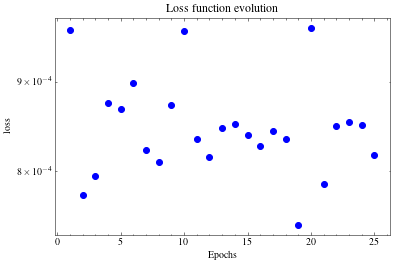

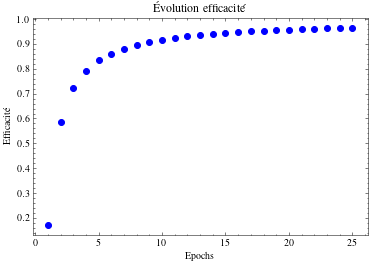

In [15]:
time_epoch = [i+1 for i in range(epoch)]

plt.figure()
plt.title('Loss function evolution')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(time_epoch, loss_evolution, 'ob',label='loss')
plt.yscale('log')
plt.savefig('Advanced NN/GAN/GAN_run/'+folder_name+'/loss.svg')

plt.figure()
plt.title('Évolution efficacité')
plt.xlabel('Epochs')
plt.ylabel(r'Efficacité')
plt.plot(time_epoch, efficacite, 'ob',label='efficacité')
plt.savefig('Advanced NN/GAN/GAN_run/'+folder_name+'/efficacite.svg')

## Mass

In [16]:
def plot_histo(title, xlabel, ylabel, list_hist,bins, label, legend = False, histtype='bar', save=False, file_folder=''):
    plt.figure()
    for indice, hist in enumerate(list_hist):
        plt.hist(hist,bins,label=label[indice],histtype=histtype)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend == True:
        plt.legend()
    if save == True:
        plt.savefig(file_folder)
    
def subplot_histo(titre, xlabel, ylabel, x, y, share, subtitle, hist_list, label, legend = False, histtype='bar', save=False, file_folder=''):  
    fig , ax = plt.subplots(x, y, sharex=share[0], sharey=share[1], constrained_layout = True)
    plt.suptitle(titre)
    fig.text(0.5, -0.05, xlabel, ha='center')
    fig.text(-0.04, 0.5, ylabel, va='center', rotation='vertical')

    for indice, hist in enumerate(hist_list): 
        compteur = 0
        for i in range(x):
            if y != 1:
                for j in range(y):
                    ax[i, j].hist(hist[compteur],100,histtype=histtype,label=label[indice])
                    ax[i, j].set_title(subtitle[compteur])
                    compteur+=1
                    if legend == True:
                        ax[i, j].legend()
            else:
                ax[i].hist(hist[compteur],100,histtype=histtype, label=label[indice])
                ax[i].set_title(subtitle[compteur])
                compteur+=1
                if legend == True:
                    ax[i].legend()
    if save == True:
        plt.savefig(file_folder)

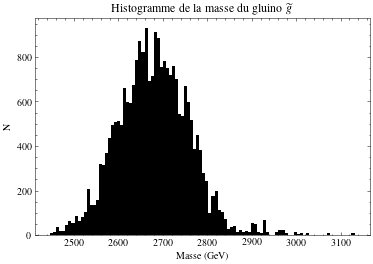

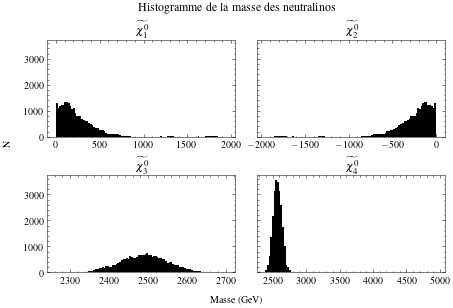

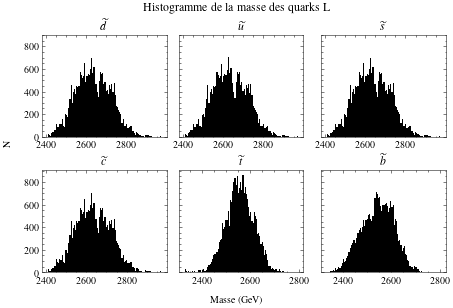

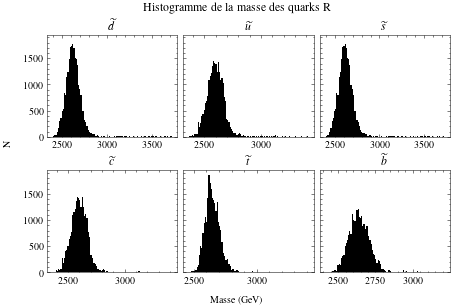

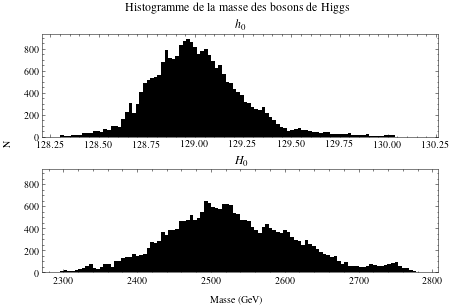

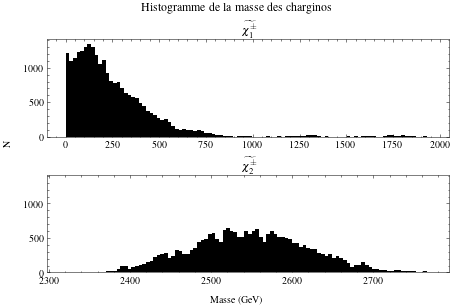

In [17]:
folder = 'Advanced NN/GAN/GAN_run/'+folder_name

file = '/histo_gluinos.svg'
titre = r'Histogramme de la masse du gluino $\widetilde{g}$'
xlabel = 'Masse (GeV)'
ylabel = 'N'
plot_histo(titre,xlabel,ylabel,[g_mass],100,['NN'],save=True,file_folder=folder+file)

file = '/histo_neutralinos.svg'
titre = 'Histogramme de la masse des neutralinos'
subtitle = [r'$\widetilde{\chi_1^0}$',r'$\widetilde{\chi_2^0}$',r'$\widetilde{\chi_3^0}$',r'$\widetilde{\chi_4^0}$']
share = [False,True]
subplot_histo(titre,xlabel,ylabel,2,2,share,subtitle,[neutralino_mass],['NN'],save=True,file_folder=folder+file)

file = '/histo_quarksL.svg'
titre = 'Histogramme de la masse des quarks L'
subtitle = [r'$\widetilde{d}$',r'$\widetilde{u}$',r'$\widetilde{s}$',r'$\widetilde{c}$',r'$\widetilde{t}$',r'$\widetilde{b}$']    
subplot_histo(titre,xlabel,ylabel,2,3,share,subtitle,[squarkL_mass],['NN'],save=True,file_folder=folder+file)

file = '/histo_quarksR.svg'
titre = 'Histogramme de la masse des quarks R' 
subplot_histo(titre,xlabel,ylabel,2,3,share,subtitle,[squarkR_mass],['NN'],save=True,file_folder=folder+file)

file = '/histo_higgs.svg'
titre = 'Histogramme de la masse des bosons de Higgs'    
subtitle = [r'$h_0$',r'$H_0$']
subplot_histo(titre,xlabel,ylabel,2,1,share,subtitle,[higgs_mass],['NN'],save=True,file_folder=folder+file)

file = '/histo_charginos.svg'
titre = 'Histogramme de la masse des charginos'    
subtitle = [r'$\widetilde{\chi_1^\pm}$',r'$\widetilde{\chi_2^\pm}$']
subplot_histo(titre,xlabel,ylabel,2,1,share,subtitle,[chargino_mass],['NN'],save=True,file_folder=folder+file)

## Param 

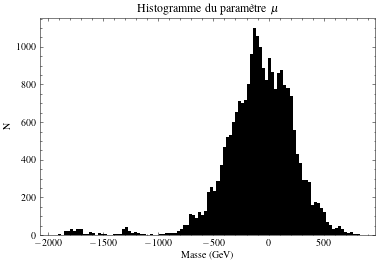

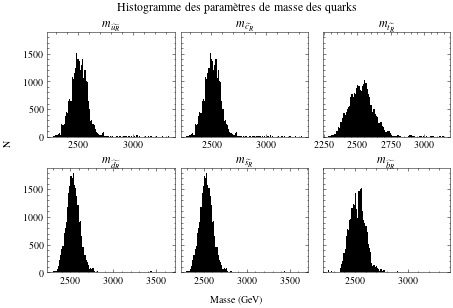

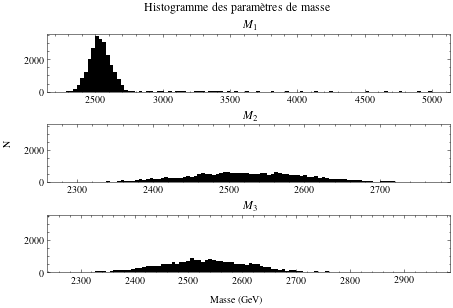

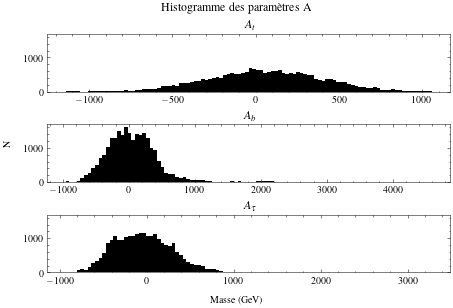

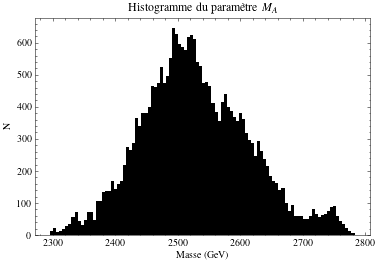

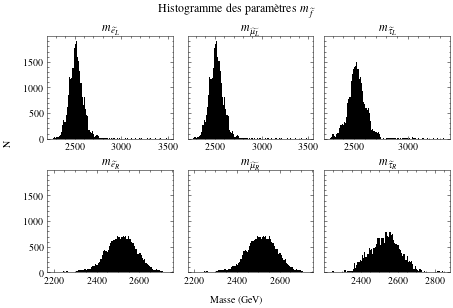

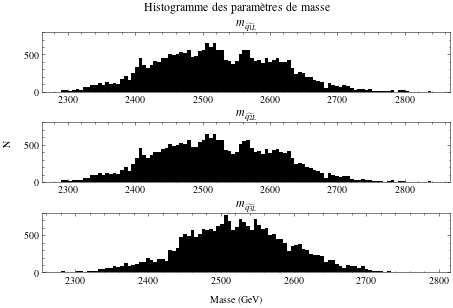

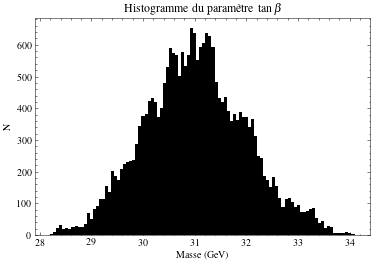

In [18]:
file = '/histo_mu.svg'
titre = r'Histogramme du paramètre $\mu$'
plot_histo(titre,xlabel,ylabel,[mu],100,['NN'],save=True,file_folder=folder+file)

file = '/histo_mquarks.svg'
titre = 'Histogramme des paramètres de masse des quarks'
subtitle = [r'$m_{\widetilde{u_R}}$',r'$m_{\widetilde{c_R}}$',r'$m_{\widetilde{t_R}}$',r'$m_{\widetilde{d_R}}$',r'$m_{\widetilde{s_R}}$',r'$m_{\widetilde{b_R}}$']
subplot_histo(titre,xlabel,ylabel,2,3,share,subtitle,[quark_param],['NN'],save=True,file_folder=folder+file)

file = '/histo_M.svg'
titre = 'Histogramme des paramètres de masse'
subtitle = [r'$M_1$',r'$M_2$',r'$M_3$']
subplot_histo(titre,xlabel,ylabel,3,1,share,subtitle,[M_param],['NN'],save=True,file_folder=folder+file)

file = '/histo_A.svg'
titre = 'Histogramme des paramètres A'
subtitle = [r'$A_t$',r'$A_b$',r'$A_\tau$']
subplot_histo(titre,xlabel,ylabel,3,1,share,subtitle,[A_param],['NN'],save=True,file_folder=folder+file)

file = '/histo_mA.svg'
titre = r'Histogramme du paramètre $M_A$'
plot_histo(titre,xlabel,ylabel,[mA_param],100,['NN'],save=True,file_folder=folder+file)

file = '/histo_mlL.svg'
titre = r'Histogramme des paramètres $m_{\widetilde{f}}$'
subtitle = [r'$m_{\widetilde{e_L}}$',r'$m_{\widetilde{\mu_L}}$',r'$m_{\widetilde{\tau_L}}$',r'$m_{\widetilde{e_R}}$',r'$m_{\widetilde{\mu_R}}$',r'$m_{\widetilde{\tau_R}}$']
subplot_histo(titre,xlabel,ylabel,2,3,share,subtitle,[mlL_param+mlR_param],['NN'],save=True,file_folder=folder+file)

file = '/histo_mqL.svg'
titre = 'Histogramme des paramètres de masse'
subtitle = [r'$m_{\widetilde{q_{1L}}}$',r'$m_{\widetilde{q_{2L}}}$',r'$m_{\widetilde{q_{3L}}}$']
subplot_histo(titre,xlabel,ylabel,3,1,share,subtitle,[mqL_param],['NN'],save=True,file_folder=folder+file)

file = '/histo_tanb.svg'
titre = r'Histogramme du paramètre $\tan \beta$'
plot_histo(titre,xlabel,ylabel,[tanB],100,['NN'],save=True,file_folder=folder+file)

# Statistique NN 

In [19]:
print('Statisique du Neural Network')
print("Nombre d'échecs:",ratio[0])
print("Nombre de succes:",ratio[1])
print('Nombre warning:', warning)
print('Éfficacité du Neural Network:',ratio[1]/taille_dataset*100/epoch/taille_batch,'%')
print('\n')

Statisique du Neural Network
Nombre d'échecs: 834
Nombre de succes: 24166
Nombre warning: 0
Éfficacité du Neural Network: 96.664 %




In [20]:
print(model.trainable_weights)

[<tf.Variable 'dense/kernel:0' shape=(4, 57) dtype=float32, numpy=
array([[-0.23811178,  0.09456042,  0.16429079,  0.29185462, -0.06275766,
         0.19826849, -0.27499834, -0.07200683,  0.13966623,  0.10609321,
        -0.26335132,  0.01019785, -0.3068139 ,  0.22891481, -0.23254016,
        -0.07338736,  0.01611939, -0.01205036, -0.01297395, -0.30056068,
        -0.22750917, -0.08362503,  0.21544357,  0.20866178,  0.14831461,
        -0.25942102,  0.12162542, -0.25920734,  0.05639654,  0.11723151,
        -0.26664552,  0.01489903, -0.03422109, -0.0770788 , -0.1380836 ,
        -0.28397056,  0.19669628, -0.21620233, -0.22680718,  0.1500198 ,
         0.0175874 ,  0.19429508, -0.00085531, -0.28314742,  0.17021392,
        -0.28489897,  0.06739784,  0.01086728, -0.22738154,  0.07311822,
         0.20289443,  0.12912798, -0.22575007,  0.22918494,  0.16136248,
        -0.2569424 ,  0.22373933],
       [ 0.02956669,  0.30773348, -0.11649103, -0.2984048 ,  0.02190283,
        -0.12121553,  